The goal of this paper is to apply dimensionality reduction techniques to the selected data. To this end, I chose several data from Eurostat-database, in order to discover if it is possible to reduce features without lossing quality of the following dataset: trade in the European Union (28 countries) during 2018.

Last but not least, in the extensions we will see how dimensionality reduction through image compression can be applied

0)Installation of the packages that we need in this paper:

In [ ]:
install.packages("readxl")
install.packages("corrplot")
install.packages("GGally")
install.packages("smacof")
install.packages("labdsv")
install.packages("vegan")
install.packages("MASS")
install.packages("ape")
install.packages("ggfortify")
install.packages("pca3d")
install.packages("pls")
install.packages("ClusterR")
install.packages("ggrepel")
install.packages("MVN")
install.packages("clusterSim")
install.packages("dimRed")
install.packages('fastICA')
install.packages('umap')
install.packages('ica')

In [2]:
library(readxl) 
library(corrplot)
library(ggplot2)
library(GGally)
library(smacof)
library(labdsv)
library(vegan)
library(MASS)
library(ape)
library(ggfortify)
library(FactoMineR)
library(factoextra)
library(pca3d)
library(pls)
library(ClusterR)
library(ggrepel)
library(MVN)
library(clusterSim)
library(dimRed)
library(fastICA)
library(umap)
library(ica)

In [3]:
getwd()
setwd("/Users/lajobu/Desktop/Project DR/")
getwd()

library(readxl)
trade <- read_excel("Trade_Project.xlsx")

[1] "/Users/lajobu/Desktop/Project DR"

[1] "/Users/lajobu/Desktop/Project DR"

Dataset description:

In [ ]:
C_EU	28 European Union countries
GDP	Gross domestic product at market prices (2018, million euro)
I_TR_EX	Intra-EU28 trade, exports (2018, millions of ECU/EURO)
I_TR_IM	Intra-EU28 trade, imports (2018, millions of ECU/EURO)
E_TR_EX	Extra-EU28 trade, exports (2018, millions of ECU/EURO)
E_TR_IM	Extra-EU28 trade, imports (2018, millions of ECU/EURO)
A_T_G	Air transport of goods (2018, tonnes)
M_T_G	Sea transport of goods (2018, tonnes)

1)Manipulation of the data

In [4]:
library(readxl)
trade <- read_excel("Trade_Project.xlsx")

In [5]:
show(trade)

# A tibble: 28 x 8
   C_EU          GDP I_TR_EX I_TR_IM E_TR_EX E_TR_IM   A_T_G  M_T_G
   <chr>       <dbl>   <dbl>   <dbl>   <dbl>   <dbl>   <dbl>  <dbl>
 1 Austria   385712. 111673. 127260.  44756.  36748.  237701      0
 2 Belgium   459820. 287689. 245472. 107201  136329. 1416428 270317
 3 Bulgaria   56087.  19275.  20403.   8821.  11702.   29867  27868
 4 Croatia    51579.  10001.  18557.   4749.   5330.   11934  21573
 5 Cyprus     21138.   1250.   5277.   3001.   3890.   32186   6948
 6 Czechia   207772. 144491. 119732.  26769.  36726.   90526      0
 7 Denmark   301341.  56594.  60784.  36013   26001   242068  95835
 8 Estonia    26036.   9814.  12435.   4611.   3794.   11475  35947
 9 Finland   234453   37884.  46716.  26352.  19861   196810 116764
10 France   2353090  290669. 392438. 201915. 175901. 2407878 308629
# … with 18 more rows


In [6]:
summary(trade)

     C_EU                GDP             I_TR_EX          I_TR_IM      
 Length:28          Min.   :  12324   Min.   :  1250   Min.   :  3867  
 Class :character   1st Qu.:  54960   1st Qu.: 17411   1st Qu.: 21085  
 Mode  :character   Median : 205834   Median : 62119   Median : 61327  
                    Mean   : 567906   Mean   :125855   Mean   :123237  
                    3rd Qu.: 477487   3rd Qu.:181395   3rd Qu.:165952  
                    Max.   :3344370   Max.   :778747   Max.   :722546  
    E_TR_EX          E_TR_IM           A_T_G             M_T_G       
 Min.   :  1081   Min.   :  1491   Min.   :  11475   Min.   :     0  
 1st Qu.:  8871   1st Qu.: 11184   1st Qu.:  28557   1st Qu.: 17917  
 Median : 22850   Median : 25792   Median : 157448   Median : 58458  
 Mean   : 69923   Mean   : 70741   Mean   : 638555   Mean   :145942  
 3rd Qu.: 76874   3rd Qu.: 85964   3rd Qu.: 828640   3rd Qu.:210472  
 Max.   :541985   Max.   :364885   Max.   :4842716   Max.   :604542  

As we can see above, our data frame "trade" has 28 rows and 8 rows, also we can see the main statistics.

In this case we have 7 different features:

In [7]:
features <- data.frame(trade[0,2:8])
features

GDP I_TR_EX I_TR_IM E_TR_EX E_TR_IM A_T_G M_T_G

A new data frame "x.trade.df" was created, in order to have only the above features, we will obtain a data frame with 28 rows and 7 columns:

In [9]:
x.trade <- trade[,c(2:8)]
x.trade.df <- data.frame(x.trade)

The dataset and the features selected are the same as the project clustering, but in this case, it was included M_T_G, this is the sea transport of goods.

I included this feature because I know that it is not highly correlated with the rest of features, as the others depend on how big the country is, but the sea transport of goods also depends on the access that the country has to the sea. As we can see, there are for example countries with zero values, the contrary to A_T_G (air transport of goods), as all the countries are well developed, and they have access to air transport.

In [10]:
x.trade.df[,7] #A_T_G

[1]      0 270317  27868  21573   6948      0  95835  35947 116764 308629
[11] 296181 190523      0  54257 501958  62660  52462      0   3207 604542
[21]  91798  90361  49107      0  23127 519061 179949 483305

At this point we are ready to begin with dimensionality reduction, after maybe we will have the need to standardize or normalized the data frame, but it would be applied in the corresponding method.

2)Correlation between variables:

In [14]:
detach(package:corrplot, unload = TRUE)
library(corrplot)

corrplot 0.84 loaded


Attaching package: ‘corrplot’


The following object is masked from ‘package:pls’:

    corrplot




Despite the fact that the package "corrplot" was installed in the beginning, several times we need to deactivate and activate once again, hence I need to run the code above in order to run a fancy correlation plot.

         GDP I_TR_EX I_TR_IM E_TR_EX E_TR_IM A_T_G M_T_G
GDP     1.00    0.82    0.93    0.94    0.89  0.92  0.69
I_TR_EX 0.82    1.00    0.95    0.93    0.92  0.89  0.65
I_TR_IM 0.93    0.95    1.00    0.97    0.91  0.95  0.63
E_TR_EX 0.94    0.93    0.97    1.00    0.91  0.95  0.63
E_TR_IM 0.89    0.92    0.91    0.91    1.00  0.92  0.83
A_T_G   0.92    0.89    0.95    0.95    0.92  1.00  0.63
M_T_G   0.69    0.65    0.63    0.63    0.83  0.63  1.00


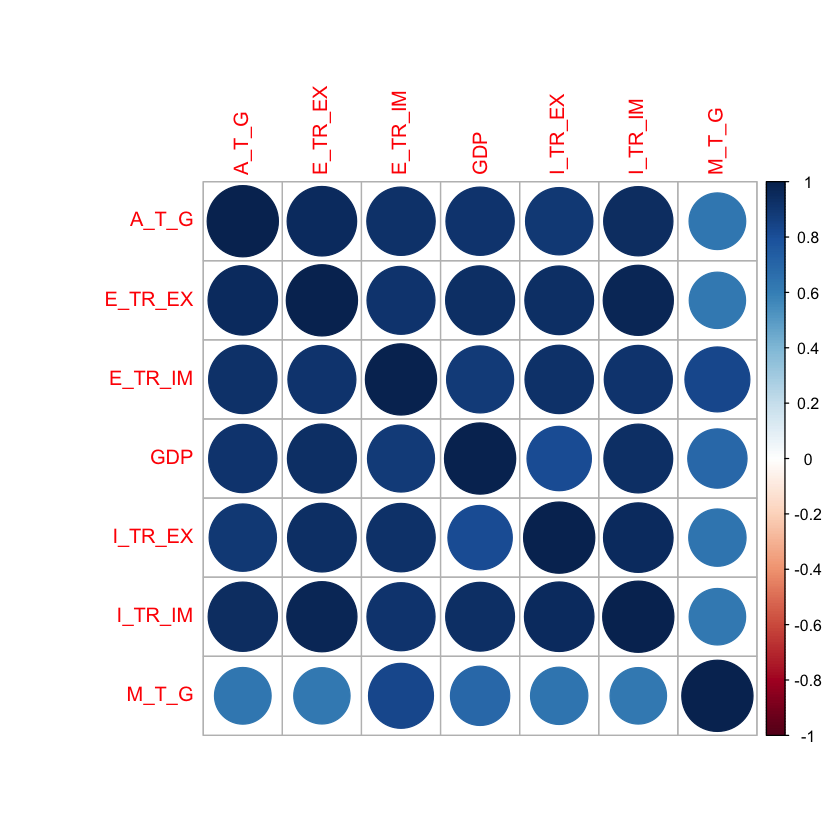

In [15]:
trade.cor<-cor(x.trade.df, method="pearson") 
print(trade.cor, digits=2)
corrplot(trade.cor, order ="alphabet")

As we can see in the graph and on the table above, all the variables are highly correlated, but M_T_G (sea transport of good) has lower correlation between variables than the rest of the data, hence the previous decision of incorporation this variable has sense, in order not to have solely highly correlation.

Due to the fact that all the variables are highly correlated, a priori, it looks like that some features can be reduced, without losing a lot of information.

Additionally it is possible to run other kind of graphs to check the correlation, as the one below:

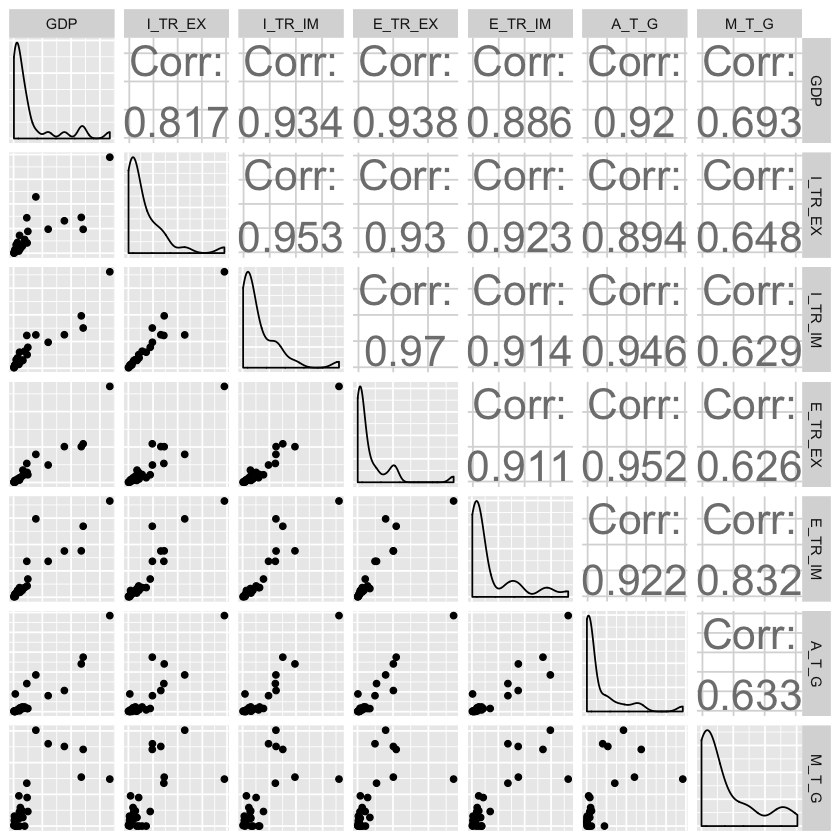

In [16]:
ggpairs(x.trade.df, axisLabels="none", columns = c(1:7), upper = list(continuous = wrap("cor", size = 9)))

3)MDS - Multidimensional Scaling:

I will apply the dimensionality reduction method MDS.

Fist of all one should standardize the variables:

In [17]:
x.trade.s <- scale(x.trade.df, center=TRUE, scale=TRUE)
head(x.trade.s)
summary(x.trade.s)

GDP        I_TR_EX     I_TR_IM     E_TR_EX    E_TR_IM    A_T_G     
[1,] -0.2117651 -0.08321239  0.02573900 -0.2214649 -0.3418405 -0.3587276
[2,] -0.1256292  0.94957815  0.78205075  0.3280349  0.6595468  0.6961247
[3,] -0.5948892 -0.62536579 -0.65792005 -0.5376829 -0.5937038 -0.5447199
[4,] -0.6001286 -0.67978063 -0.66973058 -0.5735100 -0.6577816 -0.5607683
[5,] -0.6355106 -0.73112789 -0.75469669 -0.5888910 -0.6722612 -0.5426446
[6,] -0.4185847  0.10935070 -0.02242635 -0.3797415 -0.3420598 -0.4904357
     M_T_G     
[1,] -0.7978678
[2,]  0.6799595
[3,] -0.6455130
[4,] -0.6799278
[5,] -0.7598829
[6,] -0.7978678

      GDP             I_TR_EX           I_TR_IM           E_TR_EX        
 Min.   :-0.6458   Min.   :-0.7311   Min.   :-0.7637   Min.   :-0.60579  
 1st Qu.:-0.5962   1st Qu.:-0.6363   1st Qu.:-0.6536   1st Qu.:-0.53724  
 Median :-0.4208   Median :-0.3740   Median :-0.3961   Median :-0.41422  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.:-0.1051   3rd Qu.: 0.3259   3rd Qu.: 0.2733   3rd Qu.: 0.06116  
 Max.   : 3.2271   Max.   : 3.8309   Max.   : 3.8343   Max.   : 4.15400  
    E_TR_IM            A_T_G             M_T_G        
 Min.   :-0.6964   Min.   :-0.5612   Min.   :-0.7979  
 1st Qu.:-0.5989   1st Qu.:-0.5459   1st Qu.:-0.6999  
 Median :-0.4520   Median :-0.4305   Median :-0.4783  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.1531   3rd Qu.: 0.1701   3rd Qu.: 0.3528  
 Max.   : 2.9579   Max.   : 3.7623   Max.   : 2.5072  

As we can find above, the distribution of data was standardized with mean 0 for all the variables, also with a maximun value of 4.154 and minimun of -0.7979.

We compute the distance matrix of our standardized variables:

In [18]:
distance <- dist(x.trade.s, method = "euclidean", upper = TRUE, diag = TRUE) 
distance <- as.matrix(distance)
head(distance)

1         2        3          4          5         6         7        
1 0.0000000 2.499499 1.06270323 1.12644689 1.2197880 0.3529495 0.7662019
2 2.4994992 0.000000 3.22348353 3.31131988 3.4159194 2.5563745 2.6280262
3 1.0627032 3.223484 0.00000000 0.09979673 0.2099518 1.0436344 0.6693424
4 1.1264469 3.311320 0.09979673 0.00000000 0.1351857 1.1094017 0.7470901
5 1.2197880 3.415919 0.20995182 0.13518575 0.0000000 1.2027577 0.8619085
6 0.3529495 2.556374 1.04363442 1.10940173 1.2027577 0.0000000 0.8551017
  8          9         10       ⋯ 19         20       21        22       
1 1.17723988 0.9735547 4.438445 ⋯ 1.24185007 5.079678 0.7499864 0.8716965
2 3.30898281 2.7582468 2.722305 ⋯ 3.44822826 2.726870 1.9314882 2.8063779
3 0.12968904 0.6101525 5.275197 ⋯ 0.24118836 5.659483 1.5626594 0.4952089
4 0.09398152 0.6783015 5.348129 ⋯ 0.16143343 5.752774 1.6438933 0.5635181
5 0.17416539 0.7925443 5.446278 ⋯ 0.04052768 5.853991 1.7588634 0.6869290
6 1.15397275 1.0275157 4.634560 ⋯ 1.21924095 5.109649 0.7672386 0.8973747
  23        24        25         26       27       28      
1 0.7323349 0.7218674 1.02444657 3.295780 1.026152 5.184801
2 2.8892734 3.0213397 3.20528380 1.816859 2.207987 3.336532
3 0.4025582 0.4256712 0.06758195 3.736729 1.274652 5.834532
4 0.4748626 0.4747354 0.13658468 3.814429 1.350757 5.911667
5 0.5991936 0.5614692 0.24072732 3.929116 1.473191 6.002380
6 0.7352046 0.6481690 0.99083416 3.393615 1.131941 5.383460

Analyzing the above table, we obtain the result that the country 11 is the most distinct one, we will check which country has the value 11:

In [19]:
show(trade[11,1])

# A tibble: 1 x 1
  C_EU   
  <chr>  
1 Germany


Germany is the country number 11.

We are ready to perform the multidimensional scaling of our distance matrix with the function "cmdscale":

In [20]:
n = nrow(distance) #We performed the multidimensional scaling of our distance matrix with cmdscale 
MDS <- cmdscale(distance, k= 2, eig = TRUE, x.ret = TRUE)
X <- MDS$points[,1:2]

We will plot the previous results, using the function "ggplot2". Accordingly we obtain a solution of multidimensional scaling with two dimensions:

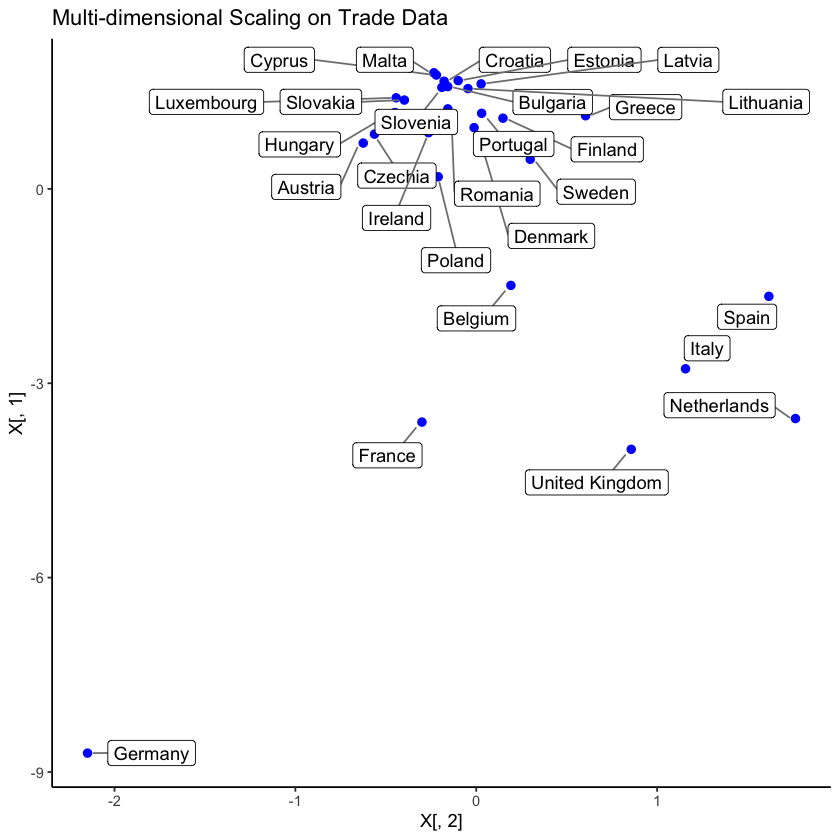

In [21]:
g <- ggplot(data.frame(X, trade), aes(X[,2], X[,1], label = C_EU, group=C_EU)) 
g + geom_point(color="blue", size=2) + 
  geom_label_repel(box.padding = 0.35, point.padding = 0.5, segment.color = "grey50") +
  ggtitle("Multi-dimensional Scaling on Trade Data") +
  theme_classic()

With this graph we can confirm that the country Germany (11) has the most distinct value.

Subsequently we will check the eigen values, also we will compute the goodness of fit of the solution:

In [22]:
ev <- MDS$eig 
gof <- MDS$GOF
print(round(ev,digits=4))

 [1] 165.7582  14.6403   5.2051   2.0171   0.7959   0.5107   0.0727   0.0000
 [9]   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000
[17]   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000
[25]   0.0000   0.0000   0.0000   0.0000


In [23]:
print(gof)

[1] 0.9544893 0.9544893


We obtain 0.9544 as the goodness of fit. It is an elevate value, hence we can conclude that the data was fitted really well.

We will continue with the fitted distances:

In the next plot we will be able to check the fitted distances against the observed distances, also we will plot a red line, as regression line:

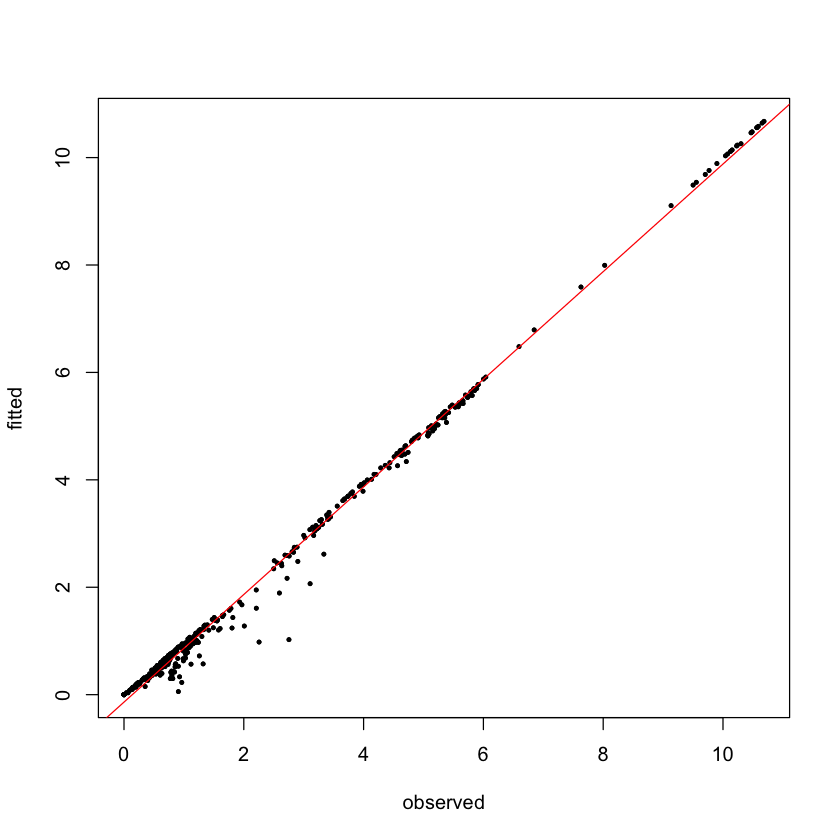

In [24]:
fitted <- as.matrix(dist(X, method = "euclidean")) #We will plot the fitted distances against the observed distances
fitted <- as.vector(fitted)
observed <- as.vector(distance)
reg <- lm(fitted~observed)
plot(observed, fitted,pch=19, cex=0.4)
abline(lm(fitted~observed), col="red")

As we can observe in the graph above, the red line of regression goes linearly respect to the fitted and observed distances, this can prove that there is a strong correlation between the fitted and observed distances, which was our initial target. Apart from that we can tell that it gives a really good goodness of fit, as the regression line has almost 45 degrees.

In [25]:
print(paste("Coefficient of determination:", summary(reg)$r.squared))

[1] "Coefficient of determination: 0.995639837782487"


The coefficient of determination confirms as well, that we have fitted the data very well, with high value of 0.9956.

4)Non-metric MDS:

In this case, contrary to the previous technique (MDS), it finds a non-parametric monotonic relationship between the dissimilarities in the item matrix and the Euclidean distances between items, and the location of each item in the low-dimensional space.

In [26]:
n <- nrow(distance)
init <- scale(matrix(runif(n*2),ncol=2),scale=FALSE)
nmmds.out <- isoMDS(distance, init, k=2, maxit = 100)

initial  value 41.107230 
iter   5 value 33.179401
iter  10 value 21.873592
iter  15 value 17.854003
iter  20 value 15.973567
iter  25 value 15.239332
iter  30 value 14.330062
iter  35 value 13.309790
iter  40 value 12.085427
iter  45 value 8.931096
iter  50 value 6.196652
iter  55 value 4.275201
iter  60 value 3.491609
iter  65 value 3.133673
iter  70 value 2.826915
iter  75 value 2.581649
iter  80 value 2.272333
iter  85 value 2.199215
iter  90 value 2.176485
iter  95 value 2.159900
iter 100 value 2.141734
final  value 2.141734 
stopped after 100 iterations


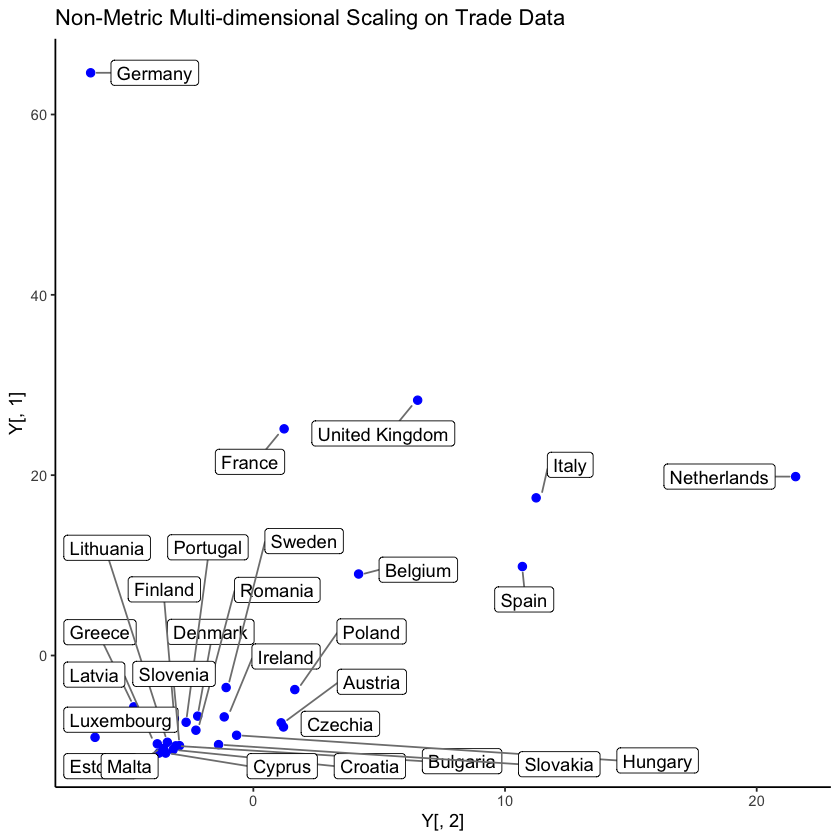

In [27]:
Y <- nmmds.out$points
g <- ggplot(data.frame(Y, trade), aes(Y[,2], Y[,1], label = C_EU, group=C_EU)) #Plot of two dimensional solution of multidimensional scaling
g + geom_point(color="blue", size=2) + 
  geom_label_repel(box.padding = 0.35, point.padding = 0.5, segment.color = "grey50") +
  ggtitle("Non-Metric Multi-dimensional Scaling on Trade Data") +
  theme_classic()

Above we obtain the plot of two dimensional solutions.

Run 0 stress 0.01738228 
Run 1 stress 0.0175526 
... Procrustes: rmse 0.007625752  max resid 0.02853824 
Run 2 stress 0.01745709 
... Procrustes: rmse 0.004338918  max resid 0.01618466 
Run 3 stress 0.01826293 
Run 4 stress 0.02526268 
Run 5 stress 0.01771918 
... Procrustes: rmse 0.01145364  max resid 0.04304375 
Run 6 stress 0.02497389 
Run 7 stress 0.01913757 
Run 8 stress 0.01738969 
... Procrustes: rmse 0.0007455293  max resid 0.00277247 
... Similar to previous best
Run 9 stress 0.01827802 
Run 10 stress 0.02073129 
Run 11 stress 0.02132895 
Run 12 stress 0.03463509 
Run 13 stress 0.03466855 
Run 14 stress 0.02125155 
Run 15 stress 0.01820231 
Run 16 stress 0.02253433 
Run 17 stress 0.02111621 
Run 18 stress 0.02095514 
Run 19 stress 0.01756606 
... Procrustes: rmse 0.007991616  max resid 0.02991871 
Run 20 stress 0.01910405 
*** Solution reached


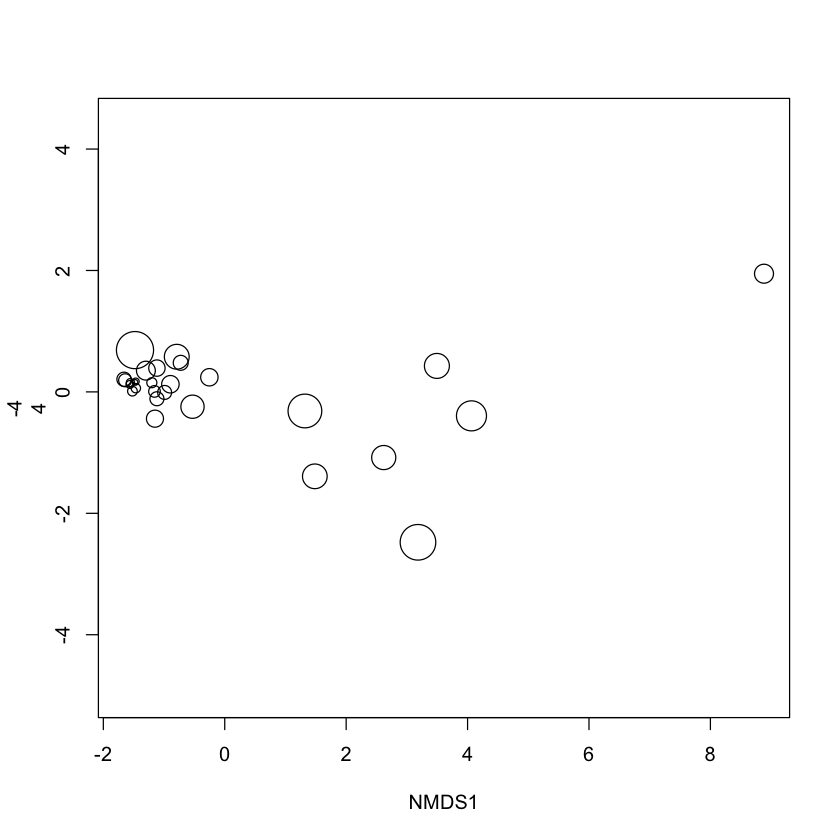

In [28]:
nmmds <- metaMDS(comm = distance, distance = "euclidean", k=2)

gof <- goodness(nmmds)

plot(nmmds, display = "sites", type = "n", ylab=c(-4,4))
points(nmmds, display = "sites", cex = 2*gof/mean(gof))

Above we have the results of the stress (or goodness of fit), we should minimize it in order to obtain the MDS solution.

Now we will graphically check the stress:

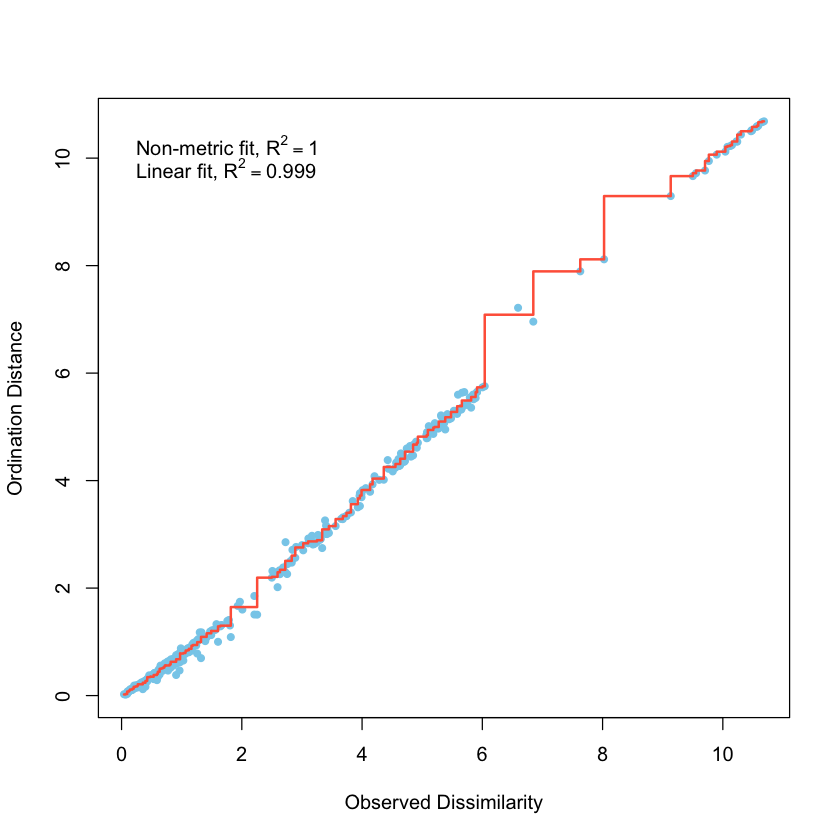

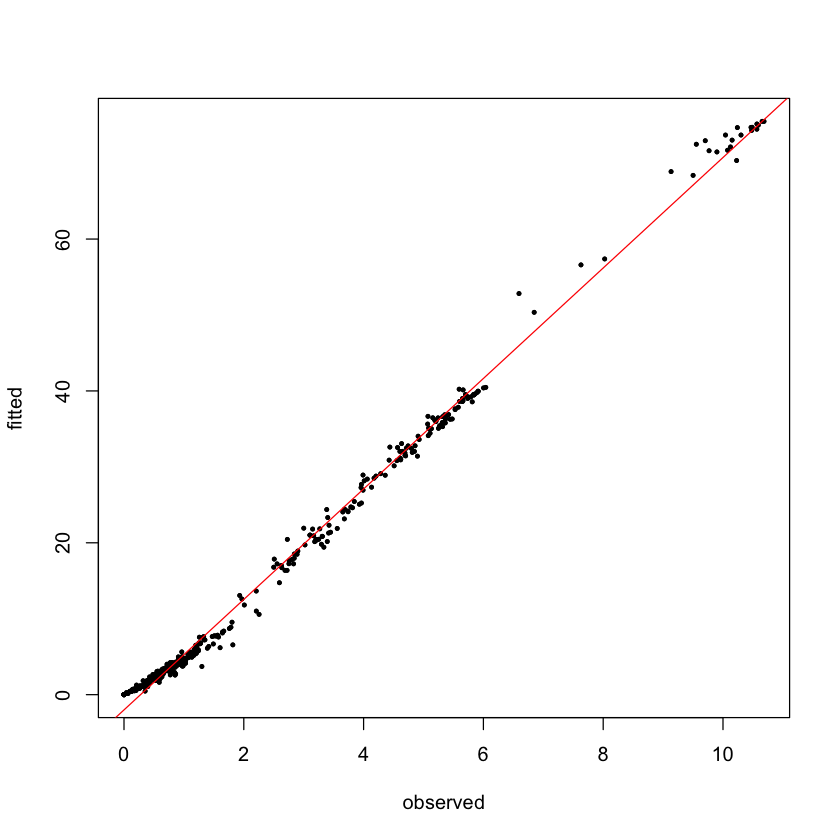

In [29]:
stressplot(nmmds, pch = 19, cex=0.75, l.col = "tomato", p.col = "skyblue")

fitted <- as.vector(as.matrix(dist(Y, method = "euclidean")))
observed <- as.vector(as.matrix(distance))
reg <- lm(fitted~observed)
plot(observed, fitted,pch=19, cex=0.4)
abline(lm(fitted~observed), col="red")

We obtain a coefficient of determination of 0.9967, we can also see in the above graph that in almost all cases the fitted distances are perfectly related with observed distances.

Now we will compute the stress for all the dimensions, and we will explain how many dimensions are required in order to obtain a good fit:

In [30]:
stress_vec <- numeric(10)
for(i in seq(10)){
  stress_vec[i] <- metaMDS(distance, distance = "euclidean", k=i)$stress
}

Run 0 stress 0.05281717 
Run 1 stress 0.05282403 
... Procrustes: rmse 0.0004708764  max resid 0.001789286 
... Similar to previous best
Run 2 stress 0.2520778 
Run 3 stress 0.1731761 
Run 4 stress 0.05281635 
... New best solution
... Procrustes: rmse 7.388826e-05  max resid 0.0002868292 
... Similar to previous best
Run 5 stress 0.4945759 
Run 6 stress 0.1681081 
Run 7 stress 0.5536417 
Run 8 stress 0.1731508 
Run 9 stress 0.2336023 
Run 10 stress 0.2343742 
Run 11 stress 0.5559248 
Run 12 stress 0.5554954 
Run 13 stress 0.5297353 
Run 14 stress 0.162004 
Run 15 stress 0.2249683 
Run 16 stress 0.5548232 
Run 17 stress 0.1859787 
Run 18 stress 0.5539594 
Run 19 stress 0.1357405 
Run 20 stress 0.2359612 
*** Solution reached
Run 0 stress 0.01738228 
Run 1 stress 0.02138496 
Run 2 stress 0.01840679 
Run 3 stress 0.01741606 
... Procrustes: rmse 0.002555882  max resid 0.009519404 
... Similar to previous best
Run 4 stress 0.02456032 
Run 5 stress 0.02073408 
Run 6 stress 0.02120438 
Run 

Warning message in metaMDS(distance, distance = "euclidean", k = i):
“stress is (nearly) zero: you may have insufficient data”


Run 0 stress 9.951893e-05 
Run 1 stress 0.001221053 
Run 2 stress 0.00156656 
Run 3 stress 0.003026895 
Run 4 stress 0.004727652 
Run 5 stress 0.0009497256 
Run 6 stress 0.001150855 
Run 7 stress 0.002667893 
Run 8 stress 0.002860258 
Run 9 stress 0.002785713 
Run 10 stress 0.00183276 
Run 11 stress 0.003546175 
Run 12 stress 0.002471824 
Run 13 stress 0.001320394 
Run 14 stress 0.001403356 
Run 15 stress 0.0008833448 
Run 16 stress 0.001193412 
Run 17 stress 0.002072234 
Run 18 stress 0.0004654194 
... Procrustes: rmse 0.01396427  max resid 0.03313719 
Run 19 stress 0.003250793 
Run 20 stress 0.004098849 
*** No convergence -- monoMDS stopping criteria:
    20: no. of iterations >= maxit


Warning message in metaMDS(distance, distance = "euclidean", k = i):
“stress is (nearly) zero: you may have insufficient data”


Run 0 stress 6.497191e-05 
Run 1 stress 0.003710676 
Run 2 stress 0.002768198 
Run 3 stress 0.001870481 
Run 4 stress 0.002345122 
Run 5 stress 0.004271395 
Run 6 stress 0.001749352 
Run 7 stress 0.001414932 
Run 8 stress 0.001289894 
Run 9 stress 0.0009897192 
Run 10 stress 0.001967402 
Run 11 stress 0.00193755 
Run 12 stress 0.001728566 
Run 13 stress 0.001063314 
Run 14 stress 0.001302272 
Run 15 stress 0.001216324 
Run 16 stress 0.002049058 
Run 17 stress 0.002092689 
Run 18 stress 0.003053759 
Run 19 stress 0.0008073599 
Run 20 stress 0.002398037 
*** No convergence -- monoMDS stopping criteria:
    20: no. of iterations >= maxit


Warning message in metaMDS(distance, distance = "euclidean", k = i):
“stress is (nearly) zero: you may have insufficient data”


Run 0 stress 0 
Run 1 stress 0.002815934 
Run 2 stress 0.002726505 
Run 3 stress 0.002070567 
Run 4 stress 0.00297358 
Run 5 stress 0.0009591147 
Run 6 stress 0.001176447 
Run 7 stress 0.00253076 
Run 8 stress 0.001563145 
Run 9 stress 0.001325166 
Run 10 stress 0.002339517 
Run 11 stress 0.002222574 
Run 12 stress 0.001477783 
Run 13 stress 0.0006719549 
Run 14 stress 0.001532495 
Run 15 stress 0.001437385 
Run 16 stress 0.002158772 
Run 17 stress 0.001982415 
Run 18 stress 0.001895717 
Run 19 stress 0.00160348 
Run 20 stress 0.001330431 
*** No convergence -- monoMDS stopping criteria:
    20: no. of iterations >= maxit


Warning message in metaMDS(distance, distance = "euclidean", k = i):
“stress is (nearly) zero: you may have insufficient data”


Run 0 stress 0 
Run 1 stress 0.001717079 
Run 2 stress 0.002911927 
Run 3 stress 0.001898301 
Run 4 stress 0.0008841195 
Run 5 stress 0.00242413 
Run 6 stress 0.002643813 
Run 7 stress 0.001320993 
Run 8 stress 0.001041571 
Run 9 stress 0.001135295 
Run 10 stress 0.001716541 
Run 11 stress 0.001522899 
Run 12 stress 0.002124107 
Run 13 stress 0.001752246 
Run 14 stress 0.002386879 
Run 15 stress 0.001879999 
Run 16 stress 0.0009784309 
Run 17 stress 0.002277553 
Run 18 stress 0.001718205 
Run 19 stress 0.002720662 
Run 20 stress 0.001782288 
*** No convergence -- monoMDS stopping criteria:
    20: no. of iterations >= maxit


Warning message in metaMDS(distance, distance = "euclidean", k = i):
“stress is (nearly) zero: you may have insufficient data”


Run 0 stress 0 
Run 1 stress 0.002284608 
Run 2 stress 0.002009958 
Run 3 stress 0.001717822 
Run 4 stress 0.001078699 
Run 5 stress 0.001470573 
Run 6 stress 0.001100044 
Run 7 stress 0.001793439 
Run 8 stress 0.001389822 
Run 9 stress 0.001793755 
Run 10 stress 0.001873776 
Run 11 stress 0.001204689 
Run 12 stress 0.001572275 
Run 13 stress 0.002655765 
Run 14 stress 0.00101662 
Run 15 stress 0.002284868 
Run 16 stress 0.001585988 
Run 17 stress 0.002036089 
Run 18 stress 0.002310427 
Run 19 stress 0.001981013 
Run 20 stress 0.004875907 
*** No convergence -- monoMDS stopping criteria:
    20: no. of iterations >= maxit


Warning message in metaMDS(distance, distance = "euclidean", k = i):
“stress is (nearly) zero: you may have insufficient data”


Run 0 stress 0 
Run 1 stress 0.001933099 
Run 2 stress 0.002456979 
Run 3 stress 0.002124617 
Run 4 stress 0.001129696 
Run 5 stress 0.001967579 
Run 6 stress 0.003566863 
Run 7 stress 0.001982035 
Run 8 stress 0.002406406 
Run 9 stress 0.001637208 
Run 10 stress 0.00210948 
Run 11 stress 0.001651795 
Run 12 stress 0.002744222 
Run 13 stress 0.001242532 
Run 14 stress 0.002020532 
Run 15 stress 0.002339169 
Run 16 stress 0.001828361 
Run 17 stress 0.0012368 
Run 18 stress 0.0009200297 
Run 19 stress 0.001691132 
Run 20 stress 0.001593036 
*** No convergence -- monoMDS stopping criteria:
    20: no. of iterations >= maxit


Warning message in metaMDS(distance, distance = "euclidean", k = i):
“stress is (nearly) zero: you may have insufficient data”


Graph of the above stress analysis:

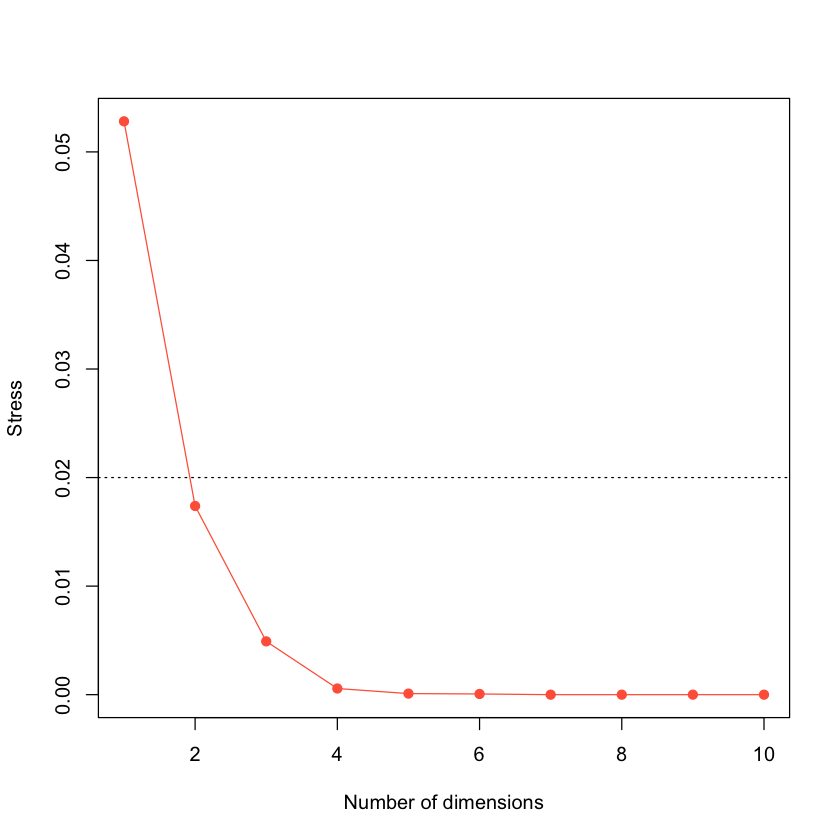

In [31]:
plot(seq(10),stress_vec, type = 'o', ylab = "Stress", xlab = "Number of dimensions",
     col="tomato", pch=19)
abline(h=0.2, lty=2)
abline(h=0.02, lty=3)

As we can find above, if we consider 2% as the maximum stress acceptable (this low value, because the data is highly correlated). Therefore, we should use two variables, obtaining a little bit less than 2% of stress.

5)PCA - Principal Component Analysis

Now we will apply the lineal dimensionality reduction method PCA, which minimized the variances.

Firstly, we will normalize the data, as it is the fist step before applying PCA:

In [32]:
x.trade.n<-data.Normalization(x.trade.df, type="n1",normalization="column")
summary(x.trade.n)

      GDP             I_TR_EX           I_TR_IM           E_TR_EX        
 Min.   :-0.6458   Min.   :-0.7311   Min.   :-0.7637   Min.   :-0.60579  
 1st Qu.:-0.5962   1st Qu.:-0.6363   1st Qu.:-0.6536   1st Qu.:-0.53724  
 Median :-0.4208   Median :-0.3740   Median :-0.3961   Median :-0.41422  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.:-0.1051   3rd Qu.: 0.3259   3rd Qu.: 0.2733   3rd Qu.: 0.06116  
 Max.   : 3.2271   Max.   : 3.8309   Max.   : 3.8343   Max.   : 4.15400  
    E_TR_IM            A_T_G             M_T_G        
 Min.   :-0.6964   Min.   :-0.5612   Min.   :-0.7979  
 1st Qu.:-0.5989   1st Qu.:-0.5459   1st Qu.:-0.6999  
 Median :-0.4520   Median :-0.4305   Median :-0.4783  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.1531   3rd Qu.: 0.1701   3rd Qu.: 0.3528  
 Max.   : 2.9579   Max.   : 3.7623   Max.   : 2.5072  

Once the data has been normalized, we can apply PCA:

In [33]:
x.trade.pca <- prcomp(x.trade.n, scale = TRUE)

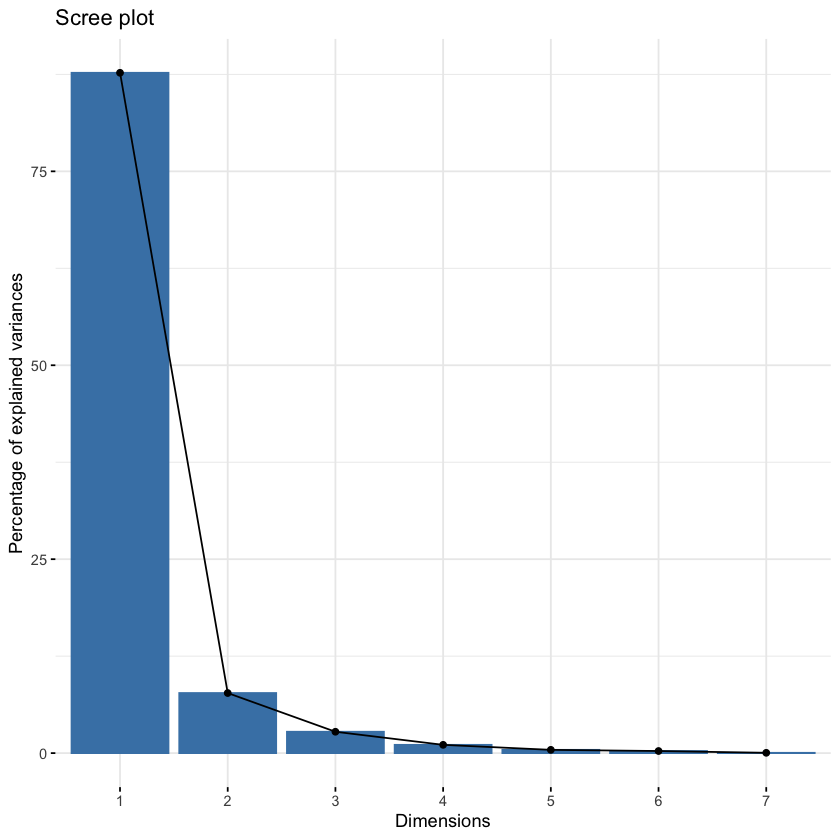

In [34]:
fviz_eig(x.trade.pca)

Above we can find the eigenvalues for each dimension. As we can see, the first variable can contain almost 80% of the information, because there is high correlation between the features.

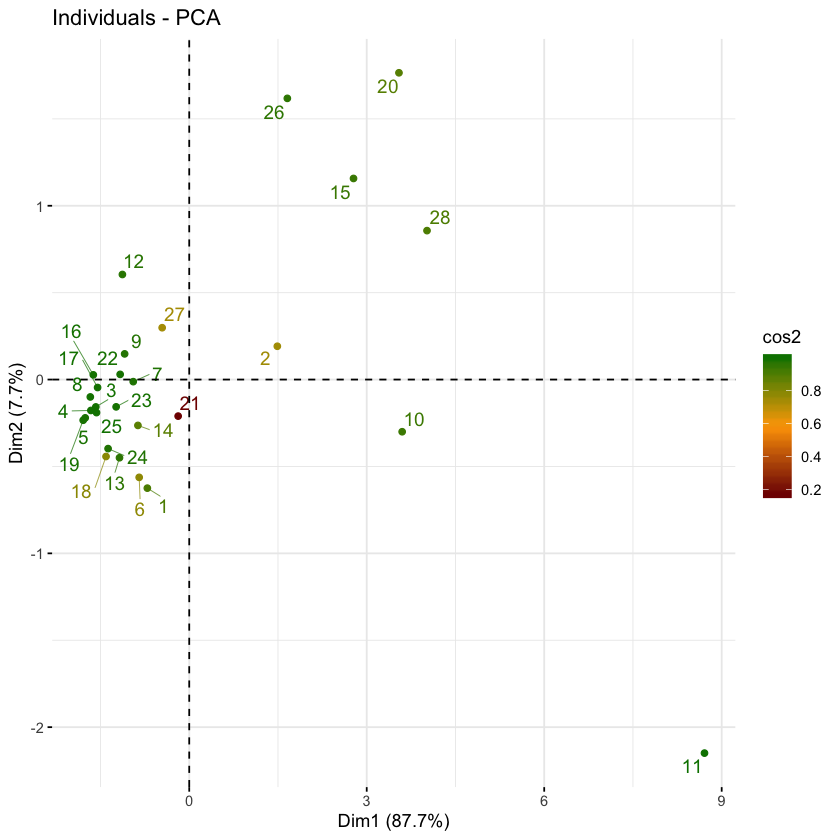

In [35]:
fviz_pca_ind(x.trade.pca, 
             col.ind = "cos2", 
             gradient.cols = c("#800000", "#FFA500", "#008000"),
             repel = TRUE)

Plot of the columns for eignvalue for each dimension:

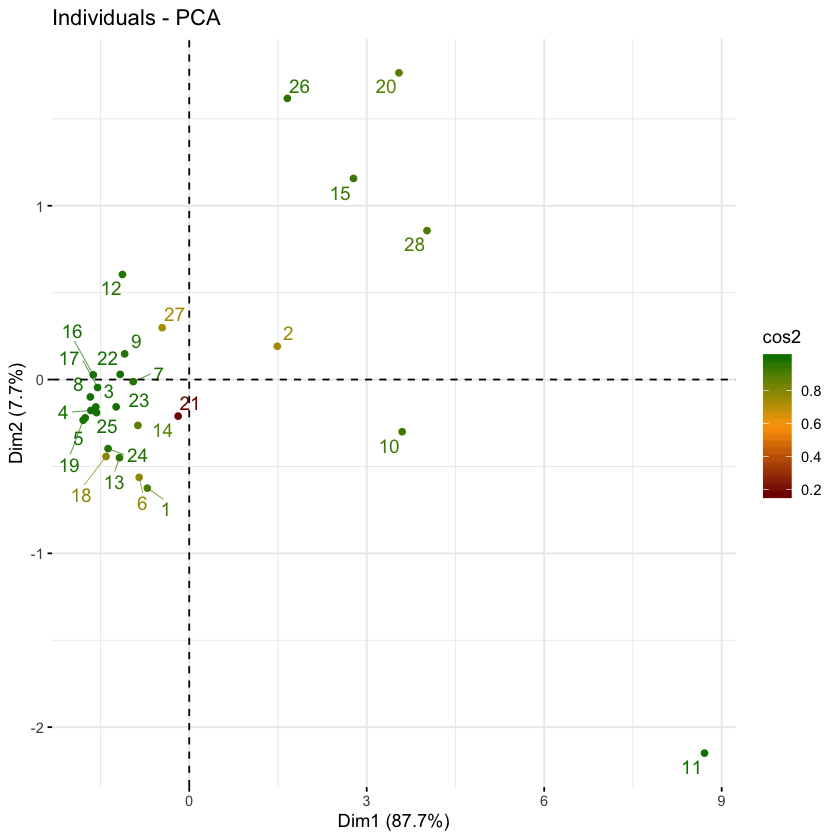

In [36]:
fviz_pca_ind(x.trade.pca, 
             col.ind = "cos2", 
             gradient.cols = c("#800000", "#FFA500", "#008000"),
             repel = TRUE)

Plot of the columns for eignvalue for each variable:

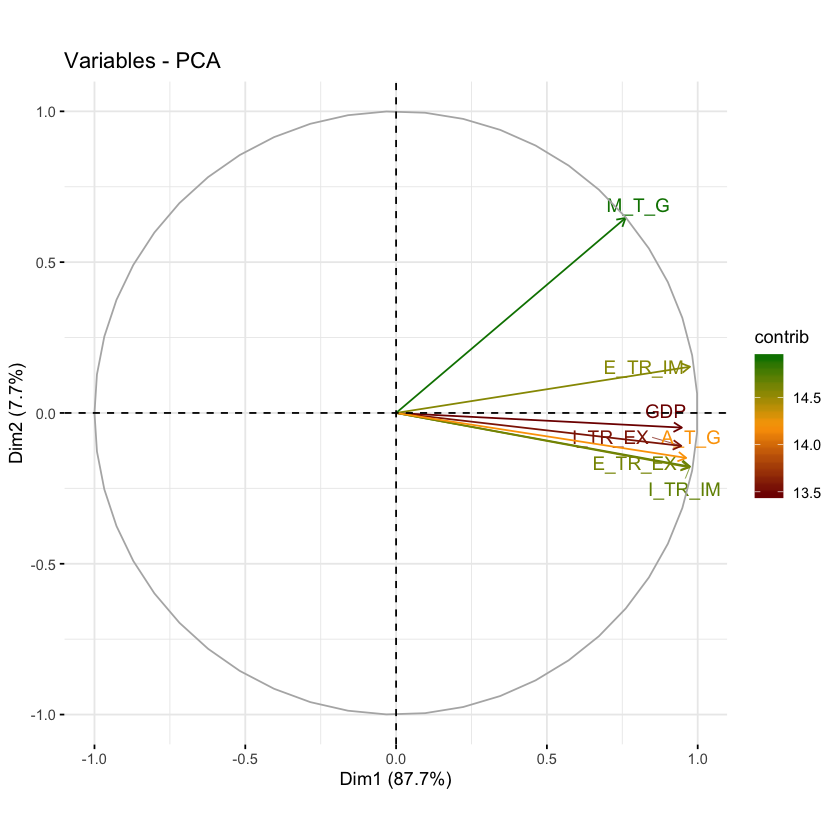

In [37]:
fviz_pca_var(x.trade.pca,
             col.var = "contrib", 
             gradient.cols = c("#800000", "#FFA500", "#008000"),
             repel = TRUE)

Plot for columns for each of the dimensions with the vectors:

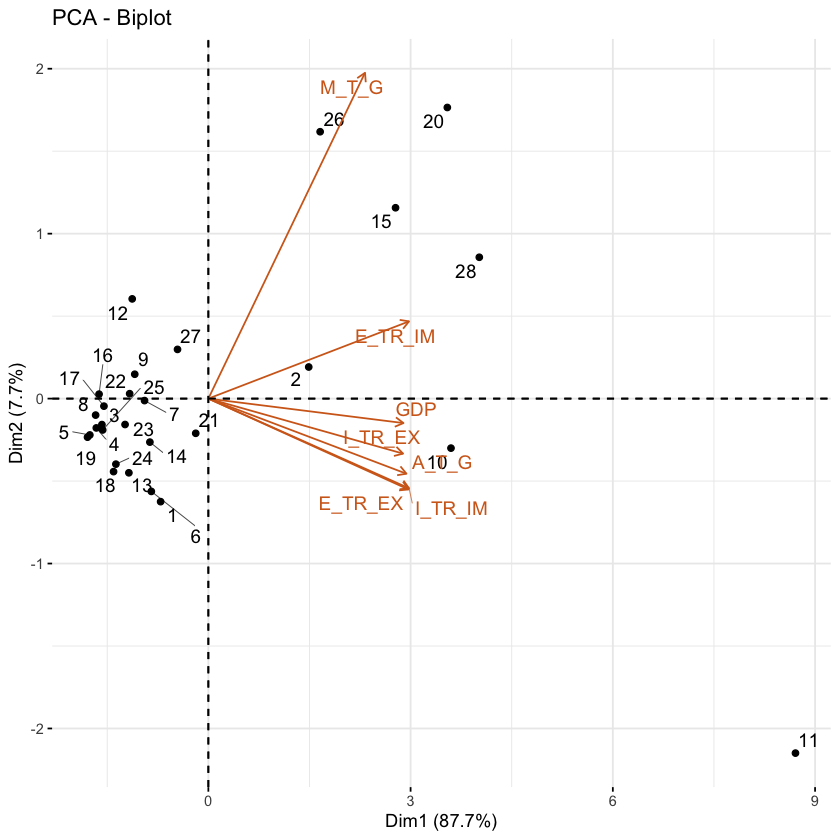

In [38]:
fviz_pca_biplot(x.trade.pca, repel = TRUE,
                col.var = "#D2691E",
                col.ind = "#000000")

Representation of the importance of each variable:

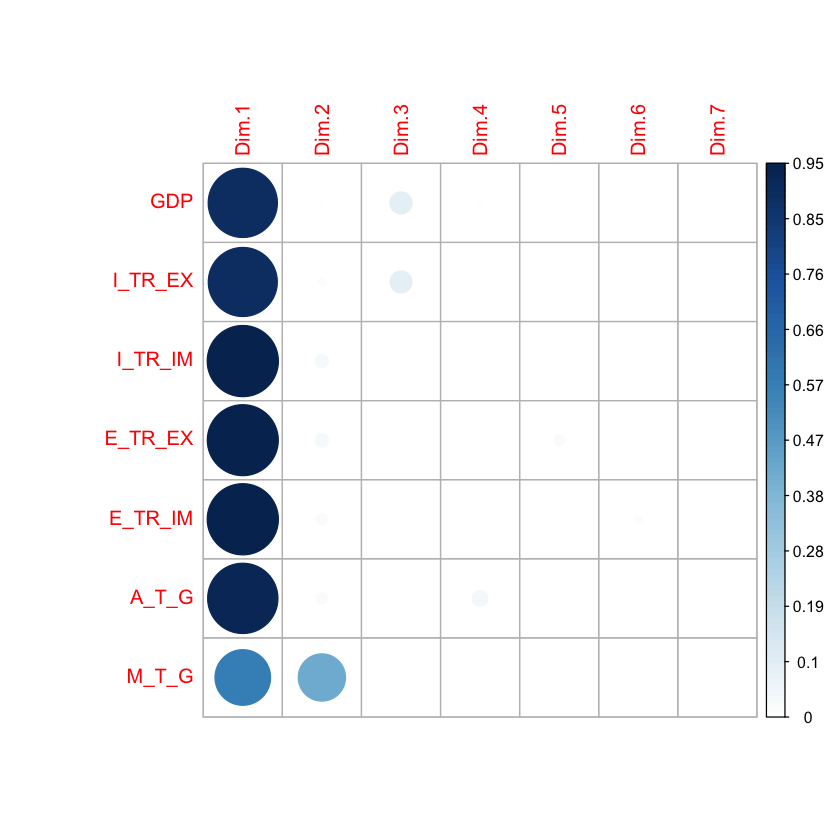

In [39]:
var <- get_pca_var(x.trade.pca) 
corrplot(var$cos2, is.corr = FALSE)

As we can see above, the least importance variable is M_T_G (sea transport of goods), because it is less correlated than the others, as we see in the previous steps.

We finished with the graphical results of PCA, now we can see the numerical results:

In [40]:
eigvalues <- get_eigenvalue(x.trade.pca) #The eigenvalues
eigvalues

eigenvalue variance.percent cumulative.variance.percent
Dim.1 6.13919303 87.70275750       87.70276                  
Dim.2 0.54223180  7.74616851       95.44893                  
Dim.3 0.19278247  2.75403532       98.20296                  
Dim.4 0.07470699  1.06724273       99.27020                  
Dim.5 0.02947691  0.42109872       99.69130                  
Dim.6 0.01891505  0.27021507       99.96152                  
Dim.7 0.00269375  0.03848215      100.00000

Above we have the table with the eigenvalue for each feature.

We can obtain the results for the variables that we used in this analysis, also the coordinates of the variables:

In [41]:
resultsvariables <- get_pca_var(x.trade.pca)
resultsvariables$coord

Dim.1     Dim.2       Dim.3       Dim.4       Dim.5         Dim.6      
GDP     0.9474782 -0.04856201  0.30064474 -0.08518174  0.0247928788 -0.03348593
I_TR_EX 0.9455461 -0.10920569 -0.29845573 -0.06257200  0.0085093814  0.01098362
I_TR_IM 0.9745411 -0.17794242 -0.02245772 -0.09145207  0.0908932163  0.02214732
E_TR_EX 0.9717463 -0.18031725  0.03124067 -0.04247943 -0.1412986982  0.01652801
E_TR_IM 0.9744126  0.15329370 -0.08532839  0.08934757 -0.0007241531 -0.10790854
A_T_G   0.9618374 -0.14905343  0.06672130  0.21139098  0.0230421281  0.05428960
M_T_G   0.7607814  0.64657091  0.01031479 -0.02643277 -0.0056081276  0.04814369
        Dim.7       
GDP     -0.023402168
I_TR_EX -0.028854475
I_TR_IM  0.031405006
E_TR_EX  0.013256981
E_TR_IM  0.010605346
A_T_G   -0.005975913
M_T_G    0.001816897

In [42]:
resultsvariables$contrib

Dim.1    Dim.2     Dim.3       Dim.4      Dim.5        Dim.6     
GDP     14.62269  0.434919 46.88562037  9.7125156  2.085316364  5.9281235
I_TR_EX 14.56311  2.199407 46.20535459  5.2408155  0.245648441  0.6377984
I_TR_IM 15.46995  5.839478  0.26161560 11.1950456 28.027281844  2.5931925
E_TR_EX 15.38135  5.996386  0.50625938  2.4154388 67.732071661  1.4442209
E_TR_IM 15.46587  4.333748  3.77676143 10.6857301  0.001779012 61.5607625
A_T_G   15.06926  4.097311  2.30919956 59.8152120  1.801205283 15.5820903
M_T_G    9.42776 77.098752  0.05518908  0.9352424  0.106697395 12.2538121
        Dim.7     
GDP     20.3308197
I_TR_EX 30.9078667
I_TR_IM 36.6134329
E_TR_EX  6.5242702
E_TR_IM  4.1753452
A_T_G    1.3257180
M_T_G    0.1225472

Above we can find the contribution to PCA for each variable.

Moreover, the results of the representation:

In [43]:
resultsvariables$cos2

Dim.1     Dim.2       Dim.3        Dim.4        Dim.5       
GDP     0.8977149 0.002358269 0.0903872582 0.0072559282 6.146868e-04
I_TR_EX 0.8940574 0.011925883 0.0890758251 0.0039152555 7.240957e-05
I_TR_IM 0.9497303 0.031663507 0.0005043490 0.0083634817 8.261577e-03
E_TR_EX 0.9442910 0.032514311 0.0009759793 0.0018045016 1.996532e-02
E_TR_IM 0.9494799 0.023498957 0.0072809341 0.0079829875 5.243977e-07
A_T_G   0.9251312 0.022216924 0.0044517320 0.0446861451 5.309397e-04
M_T_G   0.5787884 0.418053945 0.0001063949 0.0006986914 3.145110e-05
        Dim.6        Dim.7       
GDP     0.0011213078 5.476615e-04
I_TR_EX 0.0001206399 8.325807e-04
I_TR_IM 0.0004905038 9.862744e-04
E_TR_EX 0.0002731752 1.757475e-04
E_TR_IM 0.0116442520 1.124734e-04
A_T_G   0.0029473609 3.571153e-05
M_T_G   0.0023178153 3.301116e-06

In [45]:
resultsstations <- get_pca_ind(x.trade.pca) 
resultsstations$coord
resultsstations$contrib
resultsstations$cos2

Dim.1      Dim.2       Dim.3        Dim.4        Dim.5       Dim.6       
1  -0.7081383 -0.62480743 -0.112336274 -0.201171787  0.14054581 -0.130246854
2   1.4889686  0.19158694 -0.754572000  0.197345371  0.24140882  0.267109310
3  -1.5789218 -0.15750459  0.030584106  0.079321199 -0.07221526 -0.050829273
4  -1.6623837 -0.17777122  0.071245252  0.072900896 -0.05319533 -0.028212932
5  -1.7581685 -0.22041251  0.088862350  0.143517731 -0.08806775 -0.048703436
6  -0.8459732 -0.56271422 -0.413615781 -0.242020377  0.20731004 -0.143108359
7  -0.9465338 -0.01204251  0.090380132 -0.025337131 -0.06761222  0.059823996
8  -1.6721466 -0.10001795  0.058367283  0.082734696 -0.07982926  0.011938624
9  -1.0917732  0.14774514  0.118859931  0.004779335 -0.07087744  0.117784488
10  3.5990562 -0.30028081  0.813951178 -0.140561544  0.48246822  0.095626890
11  8.7091845 -2.14933446 -0.278718248 -0.013968666 -0.26728471  0.088765693
12 -1.1296802  0.60454916  0.143816281  0.014513219 -0.09598561  0.152454497
13 -1.1789932 -0.44987304 -0.211916059 -0.064819652  0.08942680 -0.111722288
14 -0.8673485 -0.26384048  0.045321471 -0.107117676 -0.31448125 -0.072591072
15  2.7767716  1.15704976  0.346364956 -0.620401860 -0.30224154  0.003906877
16 -1.6213232  0.02707640  0.067998724  0.078814511 -0.08215133  0.063274064
17 -1.5490853 -0.04576623  0.039427293  0.052118138 -0.09803904  0.013704945
18 -1.4062293 -0.44267246  0.192914725  0.685942479  0.07493964  0.259730012
19 -1.7925749 -0.23396280  0.082460147  0.136108337 -0.08132196 -0.042945919
20  3.5448899  1.76500560 -1.361177463  0.432192165 -0.02836482 -0.159059034
21 -0.1872871 -0.21034560 -0.358053462 -0.384851819  0.25987078 -0.209230015
22 -1.1675811  0.02983190  0.055475375 -0.004940270  0.05382669  0.080683614
23 -1.2356052 -0.15706467 -0.005698943 -0.085716698  0.05205733 -0.054261141
24 -1.3716383 -0.39737585 -0.160359698 -0.067183727  0.07584208 -0.079899222
25 -1.5672535 -0.19012860 -0.018772391  0.053120913 -0.06055849 -0.055166036
26  1.6582284  1.61790866  0.166356322 -0.379015257  0.11093745  0.211893847
27 -0.4575591  0.29825610  0.084061660 -0.284786700 -0.07157468  0.086048775
28  4.0190987  0.85690575  1.178773131  0.588484176  0.04516702 -0.326770051
   Dim.7        
1   0.0442750157
2   0.1641505775
3  -0.0007283838
4   0.0031378994
5  -0.0155473461
6  -0.0239781655
7  -0.0130275743
8  -0.0072342891
9   0.0029381720
10 -0.0694704145
11 -0.0037508374
12  0.0366020788
13 -0.0030589206
14  0.0129852835
15 -0.0453236641
16 -0.0018790659
17  0.0252436350
18 -0.1161225325
19 -0.0255741956
20 -0.0721597831
21 -0.0251726407
22  0.0050957286
23  0.0125846634
24 -0.0021436803
25 -0.0101960832
26 -0.0296603186
27  0.0727314207
28  0.0852834207

Dim.1       Dim.2        Dim.3        Dim.4        Dim.5       Dim.6       
1   0.29172042 2.571280e+00 2.337838e-01  1.934705528  2.39329278  3.203087864
2   1.28973874 2.417624e-01 1.054814e+01  1.861806795  7.06100089 13.471390160
3   1.45028019 1.633967e-01 1.732870e-02  0.300787141  0.63185584  0.487822872
4   1.60765644 2.081517e-01 9.403430e-02  0.254065943  0.34285222  0.150290247
5   1.79825665 3.199849e-01 1.462884e-01  0.984672573  0.93970999  0.447871639
6   0.41633593 2.085608e+00 3.169338e+00  2.800171236  5.20715697  3.866912727
7   0.52119824 9.551931e-04 1.513284e-01  0.030689909  0.55387321  0.675748677
8   1.62659482 6.588899e-02 6.311221e-02  0.327232233  0.77211898  0.026911808
9   0.69341867 1.437750e-01 2.617251e-01  0.001091983  0.60866175  2.619452716
10  7.53542829 5.938984e-01 1.227358e+01  0.944525667 28.20313818  1.726610699
11 44.12509572 3.042741e+01 1.439147e+00  0.009328044  8.65582056  1.487731864
12  0.74240637 2.407245e+00 3.831691e-01  0.010069507  1.11627775  4.388487299
13  0.80863639 1.333021e+00 8.319594e-01  0.200860304  0.96893666  2.356752651
14  0.43764093 4.585005e-01 3.805243e-02  0.548533318 11.98255785  0.994948907
15  4.48550155 8.817817e+00 2.222503e+00 18.400384879 11.06797866  0.002881999
16  1.52921962 4.828796e-03 8.565958e-02  0.296956679  0.81769103  0.755937395
17  1.39598683 1.379581e-02 2.879840e-02  0.129854951  1.16454990  0.035464103
18  1.15038434 1.290690e+00 6.894538e-01 22.493452567  0.68042970 12.737336875
19  1.86932720 3.605377e-01 1.259687e-01  0.885625639  0.80126410  0.348239609
20  7.31031658 2.051867e+01 3.432448e+01  8.929651363  0.09748104  4.776953852
21  0.02040546 2.914230e-01 2.375036e+00  7.080563310  8.18229085  8.265751384
22  0.79305765 5.861636e-03 5.701313e-02  0.001166762  0.35103897  1.229150467
23  0.88815786 1.624853e-01 6.016765e-04  0.351246162  0.32834004  0.555919890
24  1.09448517 1.040064e+00 4.763925e-01  0.215778869  0.69691613  1.205367467
25  1.42892414 2.380959e-01 6.528503e-03  0.134899949  0.44433449  0.574616269
26  1.59962945 1.724110e+01 5.126879e-01  6.867427909  1.49113303  8.477563559
27  0.12179379 5.859164e-01 1.309093e-01  3.877217197  0.62069581  1.398053352
28  9.39697401 4.836410e+00 2.574156e+01 16.555805013  0.24717404 20.161315077
   Dim.7       
1  2.598975e+00
2  3.572477e+01
3  7.034047e-04
4  1.305457e-02
5  3.204772e-01
6  7.622836e-01
7  2.250152e-01
8  6.938672e-02
9  1.144561e-02
10 6.398592e+00
11 1.865268e-02
12 1.776218e+00
13 1.240569e-02
14 2.235566e-01
15 2.723546e+00
16 4.681324e-03
17 8.448672e-01
18 1.787795e+01
19 8.671388e-01
20 6.903592e+00
21 8.401217e-01
22 3.442685e-02
23 2.099751e-01
24 6.092628e-03
25 1.378324e-01
26 1.166370e+00
27 7.013403e+00
28 9.643038e+00

Dim.1      Dim.2        Dim.3        Dim.4        Dim.5        Dim.6       
1  0.50981502 0.3968888091 1.282970e-02 4.114439e-02 2.008225e-02 1.724690e-02
2  0.73444868 0.0121596818 1.886217e-01 1.290162e-02 1.930619e-02 2.363570e-02
3  0.98427287 0.0097944646 3.693056e-04 2.484121e-03 2.058981e-03 1.020051e-03
4  0.98375714 0.0112498888 1.806913e-03 1.891869e-03 1.007331e-03 2.833491e-04
5  0.97248941 0.0152839763 2.484274e-03 6.480000e-03 2.440044e-03 7.462478e-04
6  0.53972055 0.2387984648 1.290179e-01 4.417328e-02 3.241130e-02 1.544492e-02
7  0.98108239 0.0001588062 8.944976e-03 7.029883e-04 5.005916e-03 3.919079e-03
8  0.99049808 0.0035437314 1.206824e-03 2.424824e-03 2.257507e-03 5.049094e-05
9  0.95598152 0.0175069720 1.133067e-02 1.831975e-05 4.029031e-03 1.112656e-02
10 0.92705697 0.0064533367 4.741610e-02 1.414042e-03 1.665968e-02 6.544692e-04
11 0.94075351 0.0572966020 9.634999e-04 2.420086e-06 8.860722e-04 9.772623e-05
12 0.75230952 0.2154511399 1.219275e-02 1.241690e-04 5.431225e-03 1.370143e-02
13 0.83635220 0.1217717453 2.702056e-02 2.528017e-03 4.811738e-03 7.510109e-03
14 0.80050802 0.0740732302 2.185679e-03 1.220958e-02 1.052369e-01 5.607185e-03
15 0.79921758 0.1387678199 1.243519e-02 3.989614e-02 9.468758e-03 1.582137e-06
16 0.99157882 0.0002765476 1.744173e-03 2.343152e-03 2.545759e-03 1.510218e-03
17 0.99304684 0.0008667809 6.432992e-04 1.124079e-03 3.977564e-03 7.772732e-05
18 0.71447674 0.0708012336 1.344642e-02 1.700009e-01 2.029080e-03 2.437362e-02
19 0.97299761 0.0165748942 2.058948e-03 5.609531e-03 2.002501e-03 5.584714e-04
20 0.70786193 0.1754830723 1.043692e-01 1.052196e-02 4.532139e-05 1.425147e-03
21 0.07501724 0.0946263787 2.741834e-01 3.167615e-01 1.444309e-01 9.362532e-02
22 0.99024822 0.0006464454 2.235478e-03 1.772848e-05 2.104579e-03 4.728688e-03
23 0.97580073 0.0157673479 2.075823e-05 4.696048e-03 1.732070e-03 1.881826e-03
24 0.90379018 0.0758562480 1.235318e-02 2.168286e-03 2.763178e-03 3.066716e-03
25 0.98156278 0.0144455637 1.408247e-04 1.127640e-03 1.465513e-03 1.216139e-03
26 0.49130571 0.4677040181 4.944720e-03 2.566708e-02 2.198971e-03 8.022316e-03
27 0.51782897 0.2200242498 1.747784e-02 2.006002e-01 1.267099e-02 1.831392e-02
28 0.86199101 0.0391842474 7.414909e-02 1.848055e-02 1.088650e-04 5.698098e-03
   Dim.7       
1  1.992939e-03
2  8.926377e-03
3  2.094666e-07
4  3.505124e-06
5  7.604601e-05
6  4.335984e-04
7  1.858490e-04
8  1.853944e-05
9  6.923713e-06
10 3.454053e-04
11 1.744927e-07
12 7.897635e-04
13 5.629930e-06
14 1.794243e-04
15 2.129290e-04
16 1.331901e-06
17 2.637077e-04
18 4.872017e-03
19 1.980437e-04
20 2.933145e-04
21 1.355198e-03
22 1.886178e-05
23 1.012243e-04
24 2.207539e-06
25 4.154381e-05
26 1.571863e-04
27 1.308386e-02
28 3.881277e-04

6)Conclusions:

As a result of the above analysis, we can conclude that it is possible to reduce dimensions to the dataset selected, not loosing a lot of information.

The first step of the analysis allow us to conclude that all the variables were highly correlated, probably because all of them depend on how big the country is. This means that bigger economies will have a big GDP, but also the same for the rest of variables. The European Union 28 has freedom in terms of intra-comunitari trade, which means that there are not any barriers, also for the extra-comunitari trade, as the European Union 28 has common trade policy against external countries, via tariff, or free trade agreements (for example: CETA, between EU-28 and Canada). Consequently, as per previous arguments big economies will have bigger GDP, volume of intra-comunitary and extra-comunitari trade, but also air transport of goods.

On the other hand, there is one variables less correlated, sea transport of goods, as this depends not only on how big is the economy, but also it depends on geographical reasons, as there are countries with zero values - they have not access to sea ports.

After applying dimensionality reduction techniques, we can find the best goodness of fit with two variables, this means that we reduced five features. Moreover, we checked that one variable alone could contain almost 80% of the information, but one of the main reasons of applying dimensionality reduction apart from compression data, is visualization, and at least we need two variables in order to make a graphical representation. Additionally, we consider the variables were highly correlated, hence we set up a low acceptable level of stress, less than 2% and we achieved it with two variables.

7)Extensions - Image compressing:

One of the applications of dimensionality reduction is image compressing, when we want to reduce the weight in term of memory of the image, not losing the quality and shape.

First we should install the package "jpeg", in order to manipulate .jpeg files:

In [46]:
install.packages("jpeg")
library(jpeg)


The downloaded binary packages are in
	/var/folders/sm/pl2bslsj01l17ynh4y68v3500000gn/T//RtmpnBRb0b/downloaded_packages


In [47]:
getwd()
setwd("/Users/lajobu/Desktop/Project DR/")
getwd()

rome <- readJPEG("Rome.jpg")

[1] "/Users/lajobu/Desktop/Project DR"

[1] "/Users/lajobu/Desktop/Project DR"

We can see the original photo below (1.243.080 bytes - 1,2 MB):

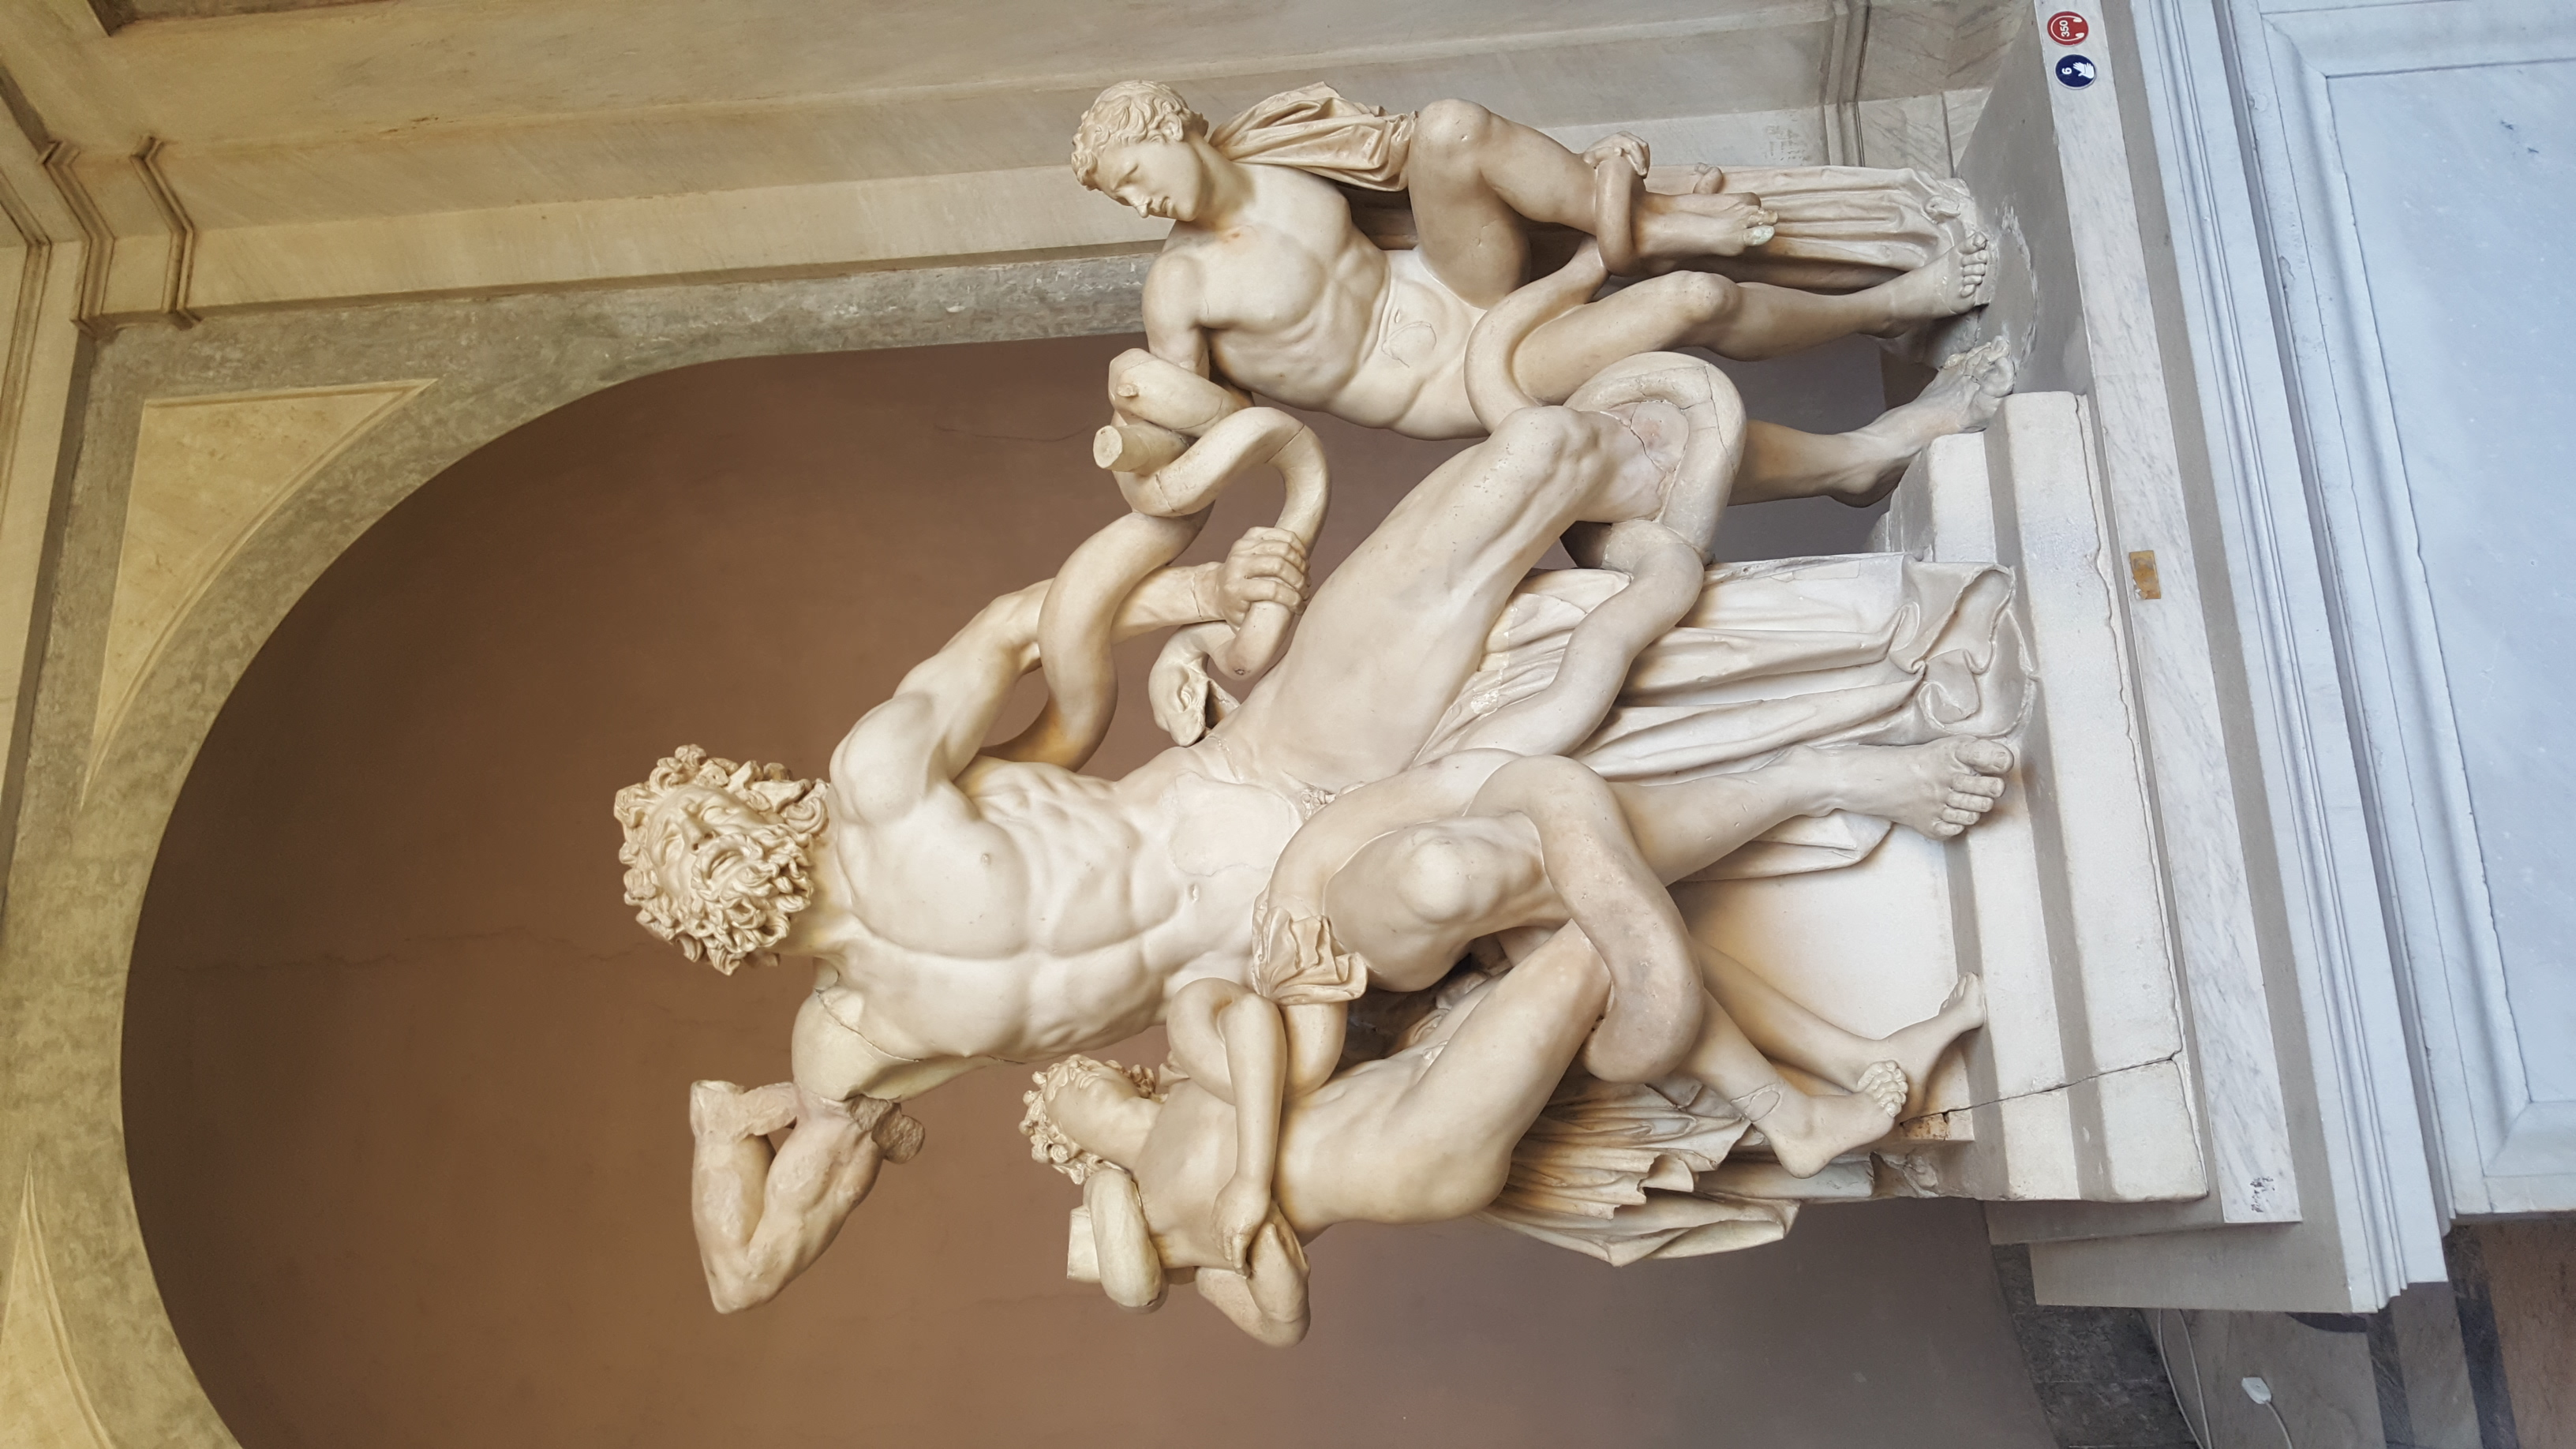

In [48]:
ncol(rome)
nrow(rome)

[1] 3264

[1] 1836

As we can see above the Rome image is now represented as three matrices in an array of 3264x1836. Each matrix corresponds to the RGB (red, green and blue) color value scheme.

Now we will extract the individual color value matrices to perform PCA on each one:

In [49]:
r <- rome[,,1]
g <- rome[,,2]
b <- rome[,,3]

We performed PCA on each color value matrix:

In [50]:
rome.r.pca <- prcomp(r, center = FALSE)
rome.g.pca <- prcomp(g, center = FALSE)
rome.b.pca <- prcomp(b, center = FALSE)

Now we collect the PCA objects into the list "rgb.pca":

In [51]:
rgb.pca <- list(rome.r.pca, rome.g.pca, rome.b.pca)

At this point we are ready to compress the image. After the principal components were founded for each color value matrix, we have a new dimensions that describe the original pixels (data).

We are going to apply one "for" loop in order to reconstruct the original image using the projections of the data. We will create different files, with different number of components:

In [ ]:
for (i in seq.int(3, round(nrow(rome) - 10), by = 40)) {
  pca.img <- sapply(rgb.pca, function(j) {
    compressed.img <- j$x[,1:i] %*% t(j$rotation[,1:i])
  }, simplify = 'array')
  writeJPEG(pca.img, paste('rome_compressed_', round(i,0), '_components.jpg', sep = ''))
}

3 components (182.824 bytes - 188 KB):

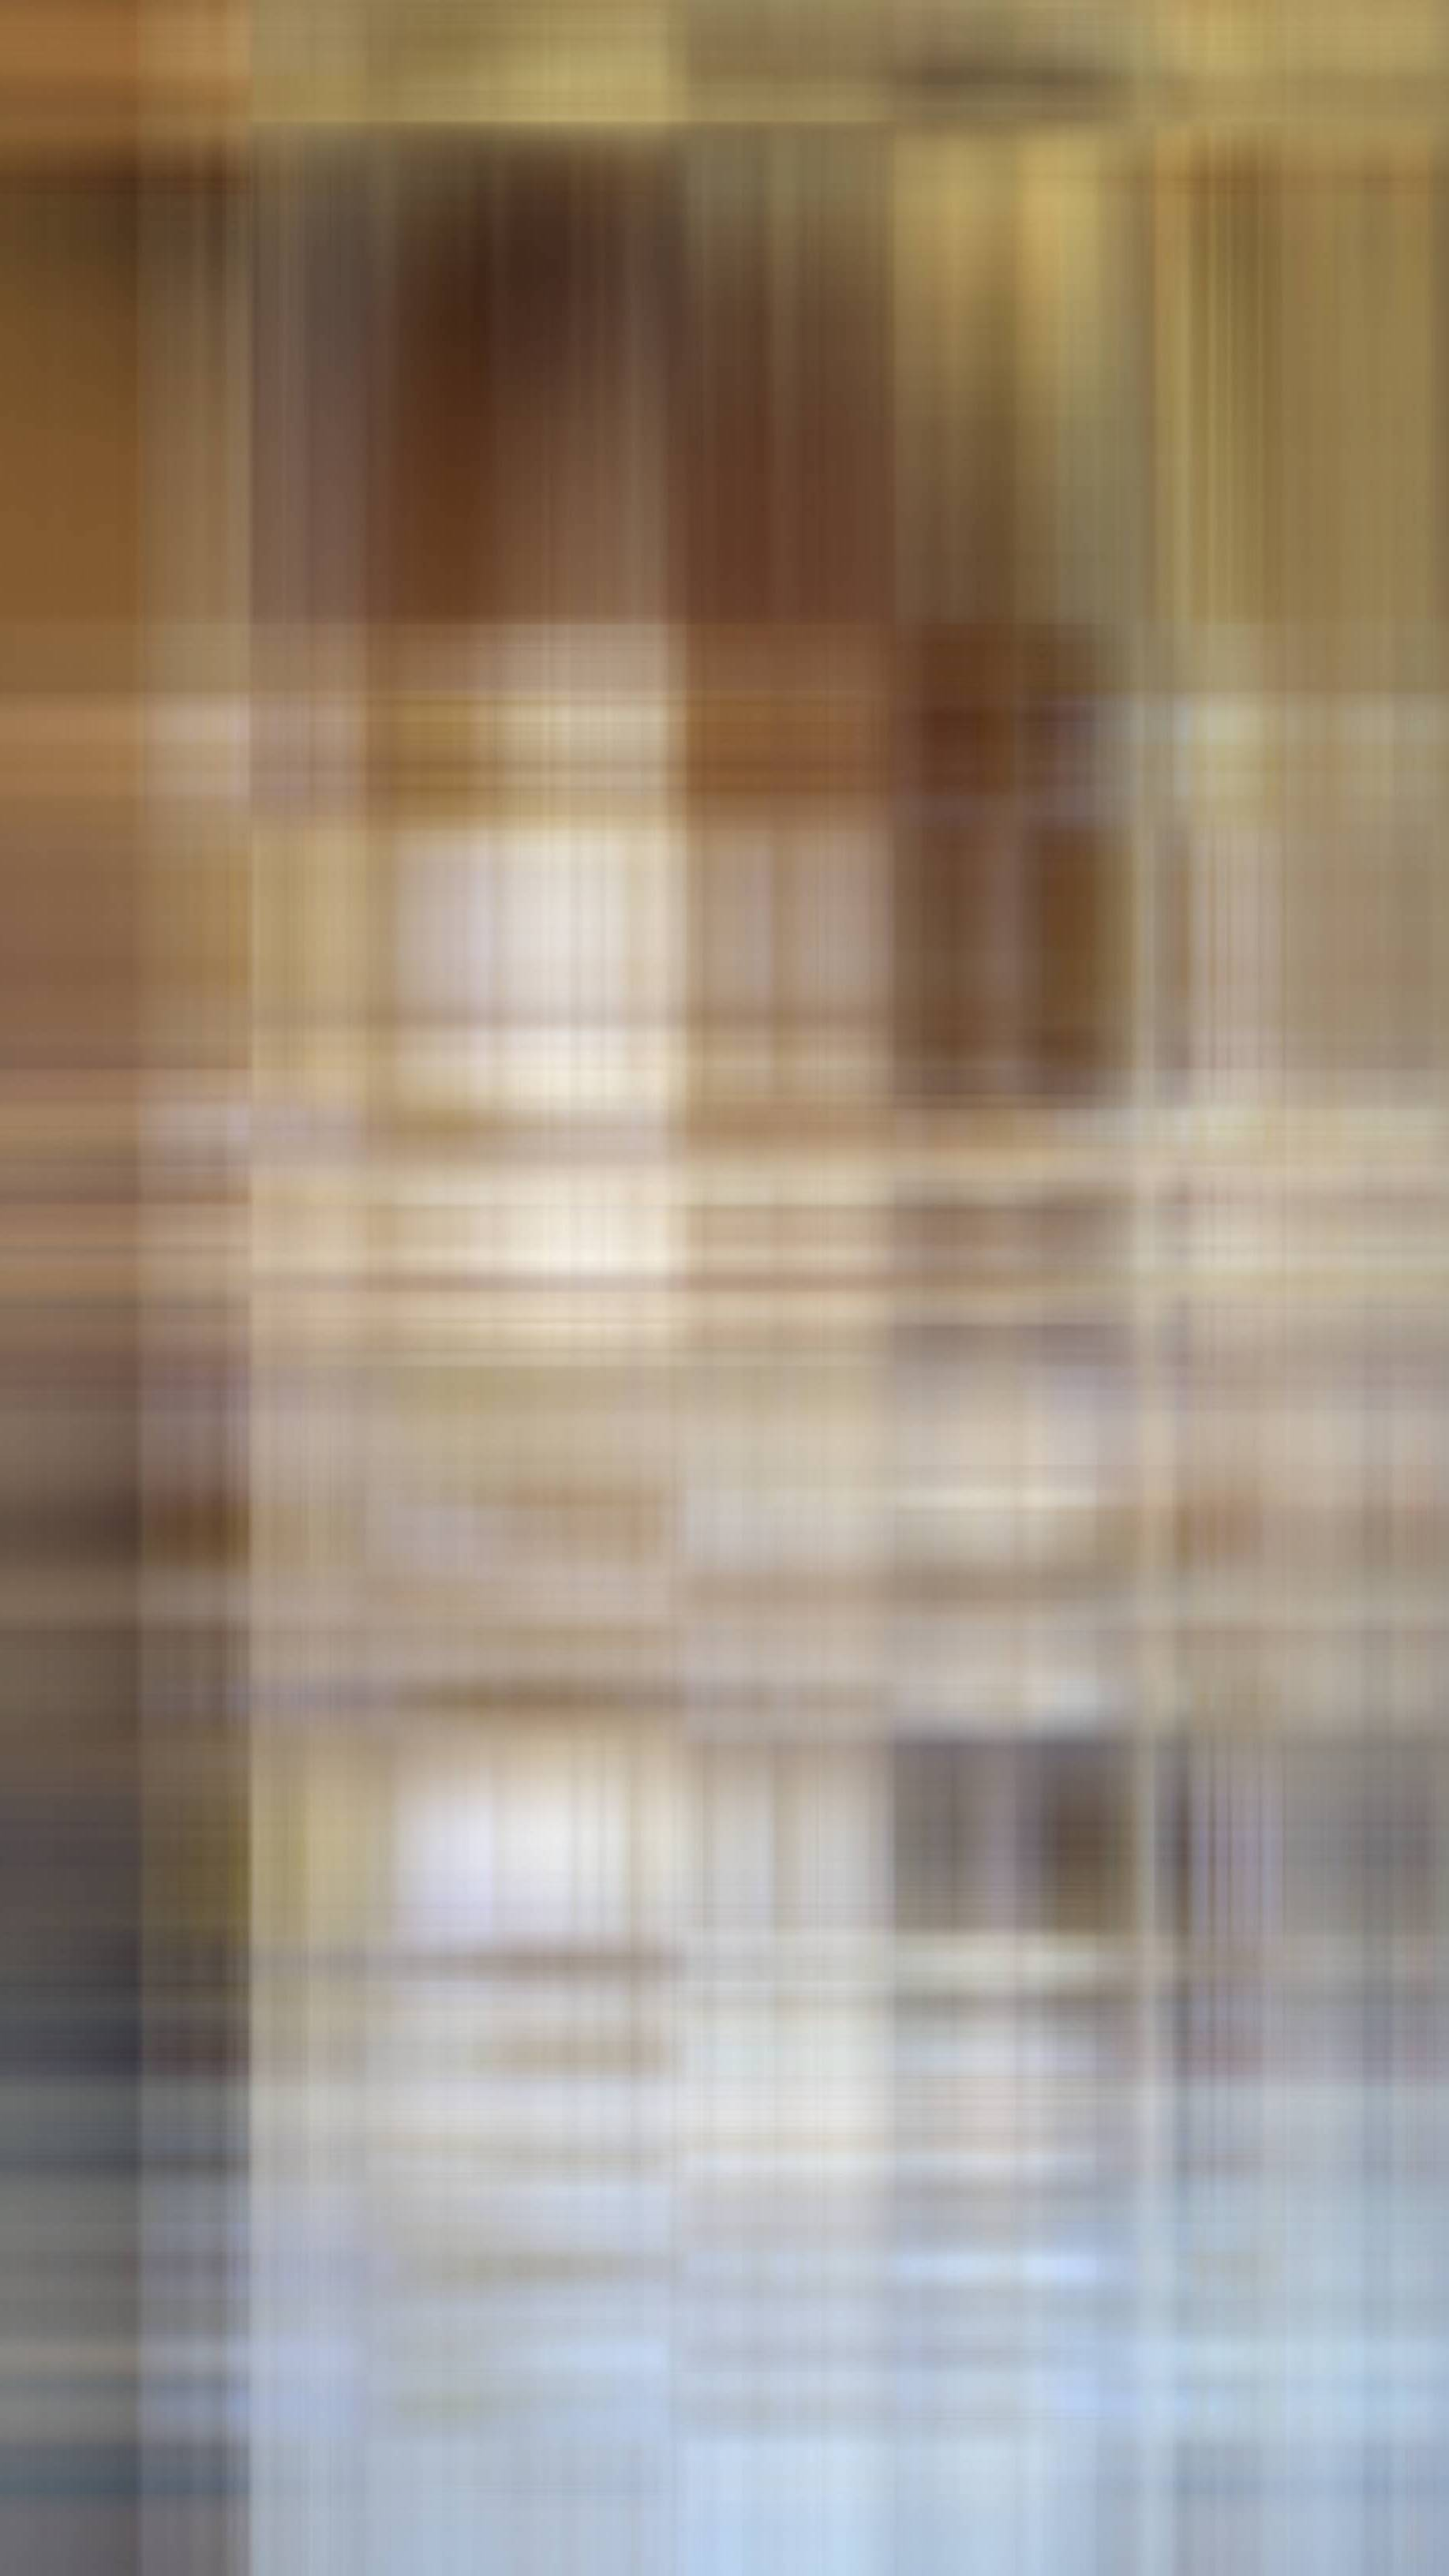

43 components (332.384 bytes - 336 KB):

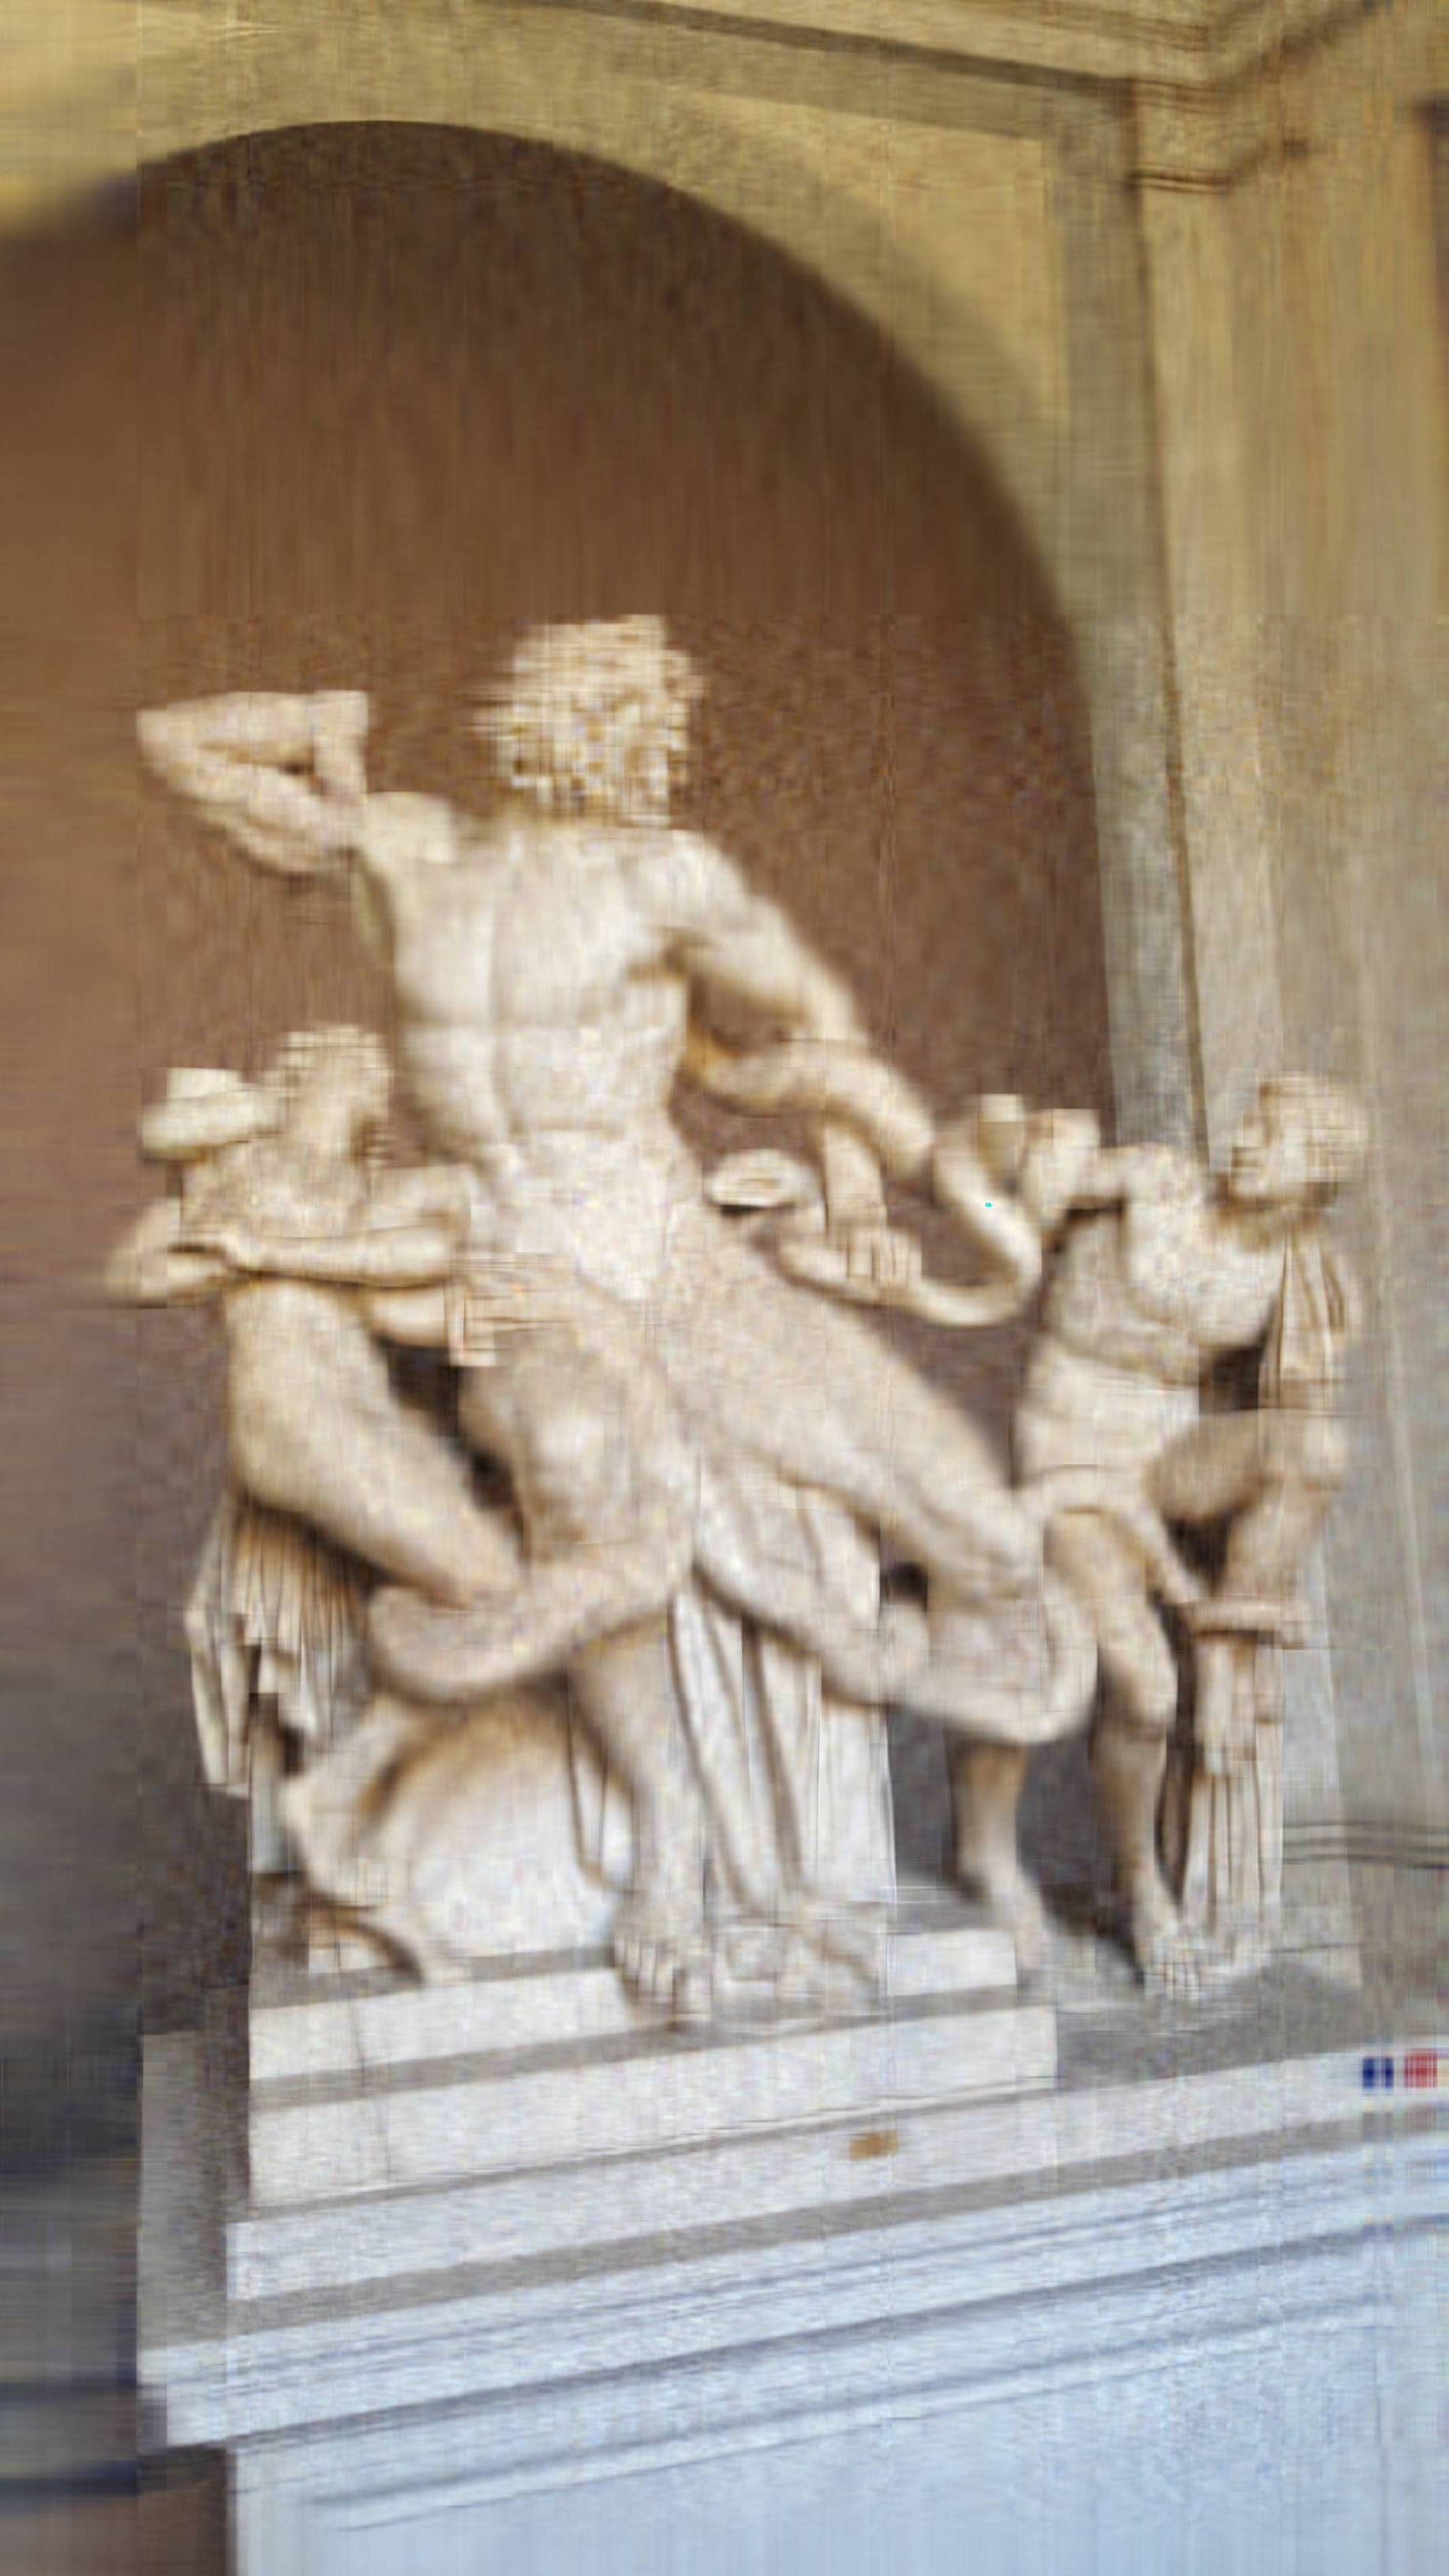

83 components (375.131 bytes - 377 KB):

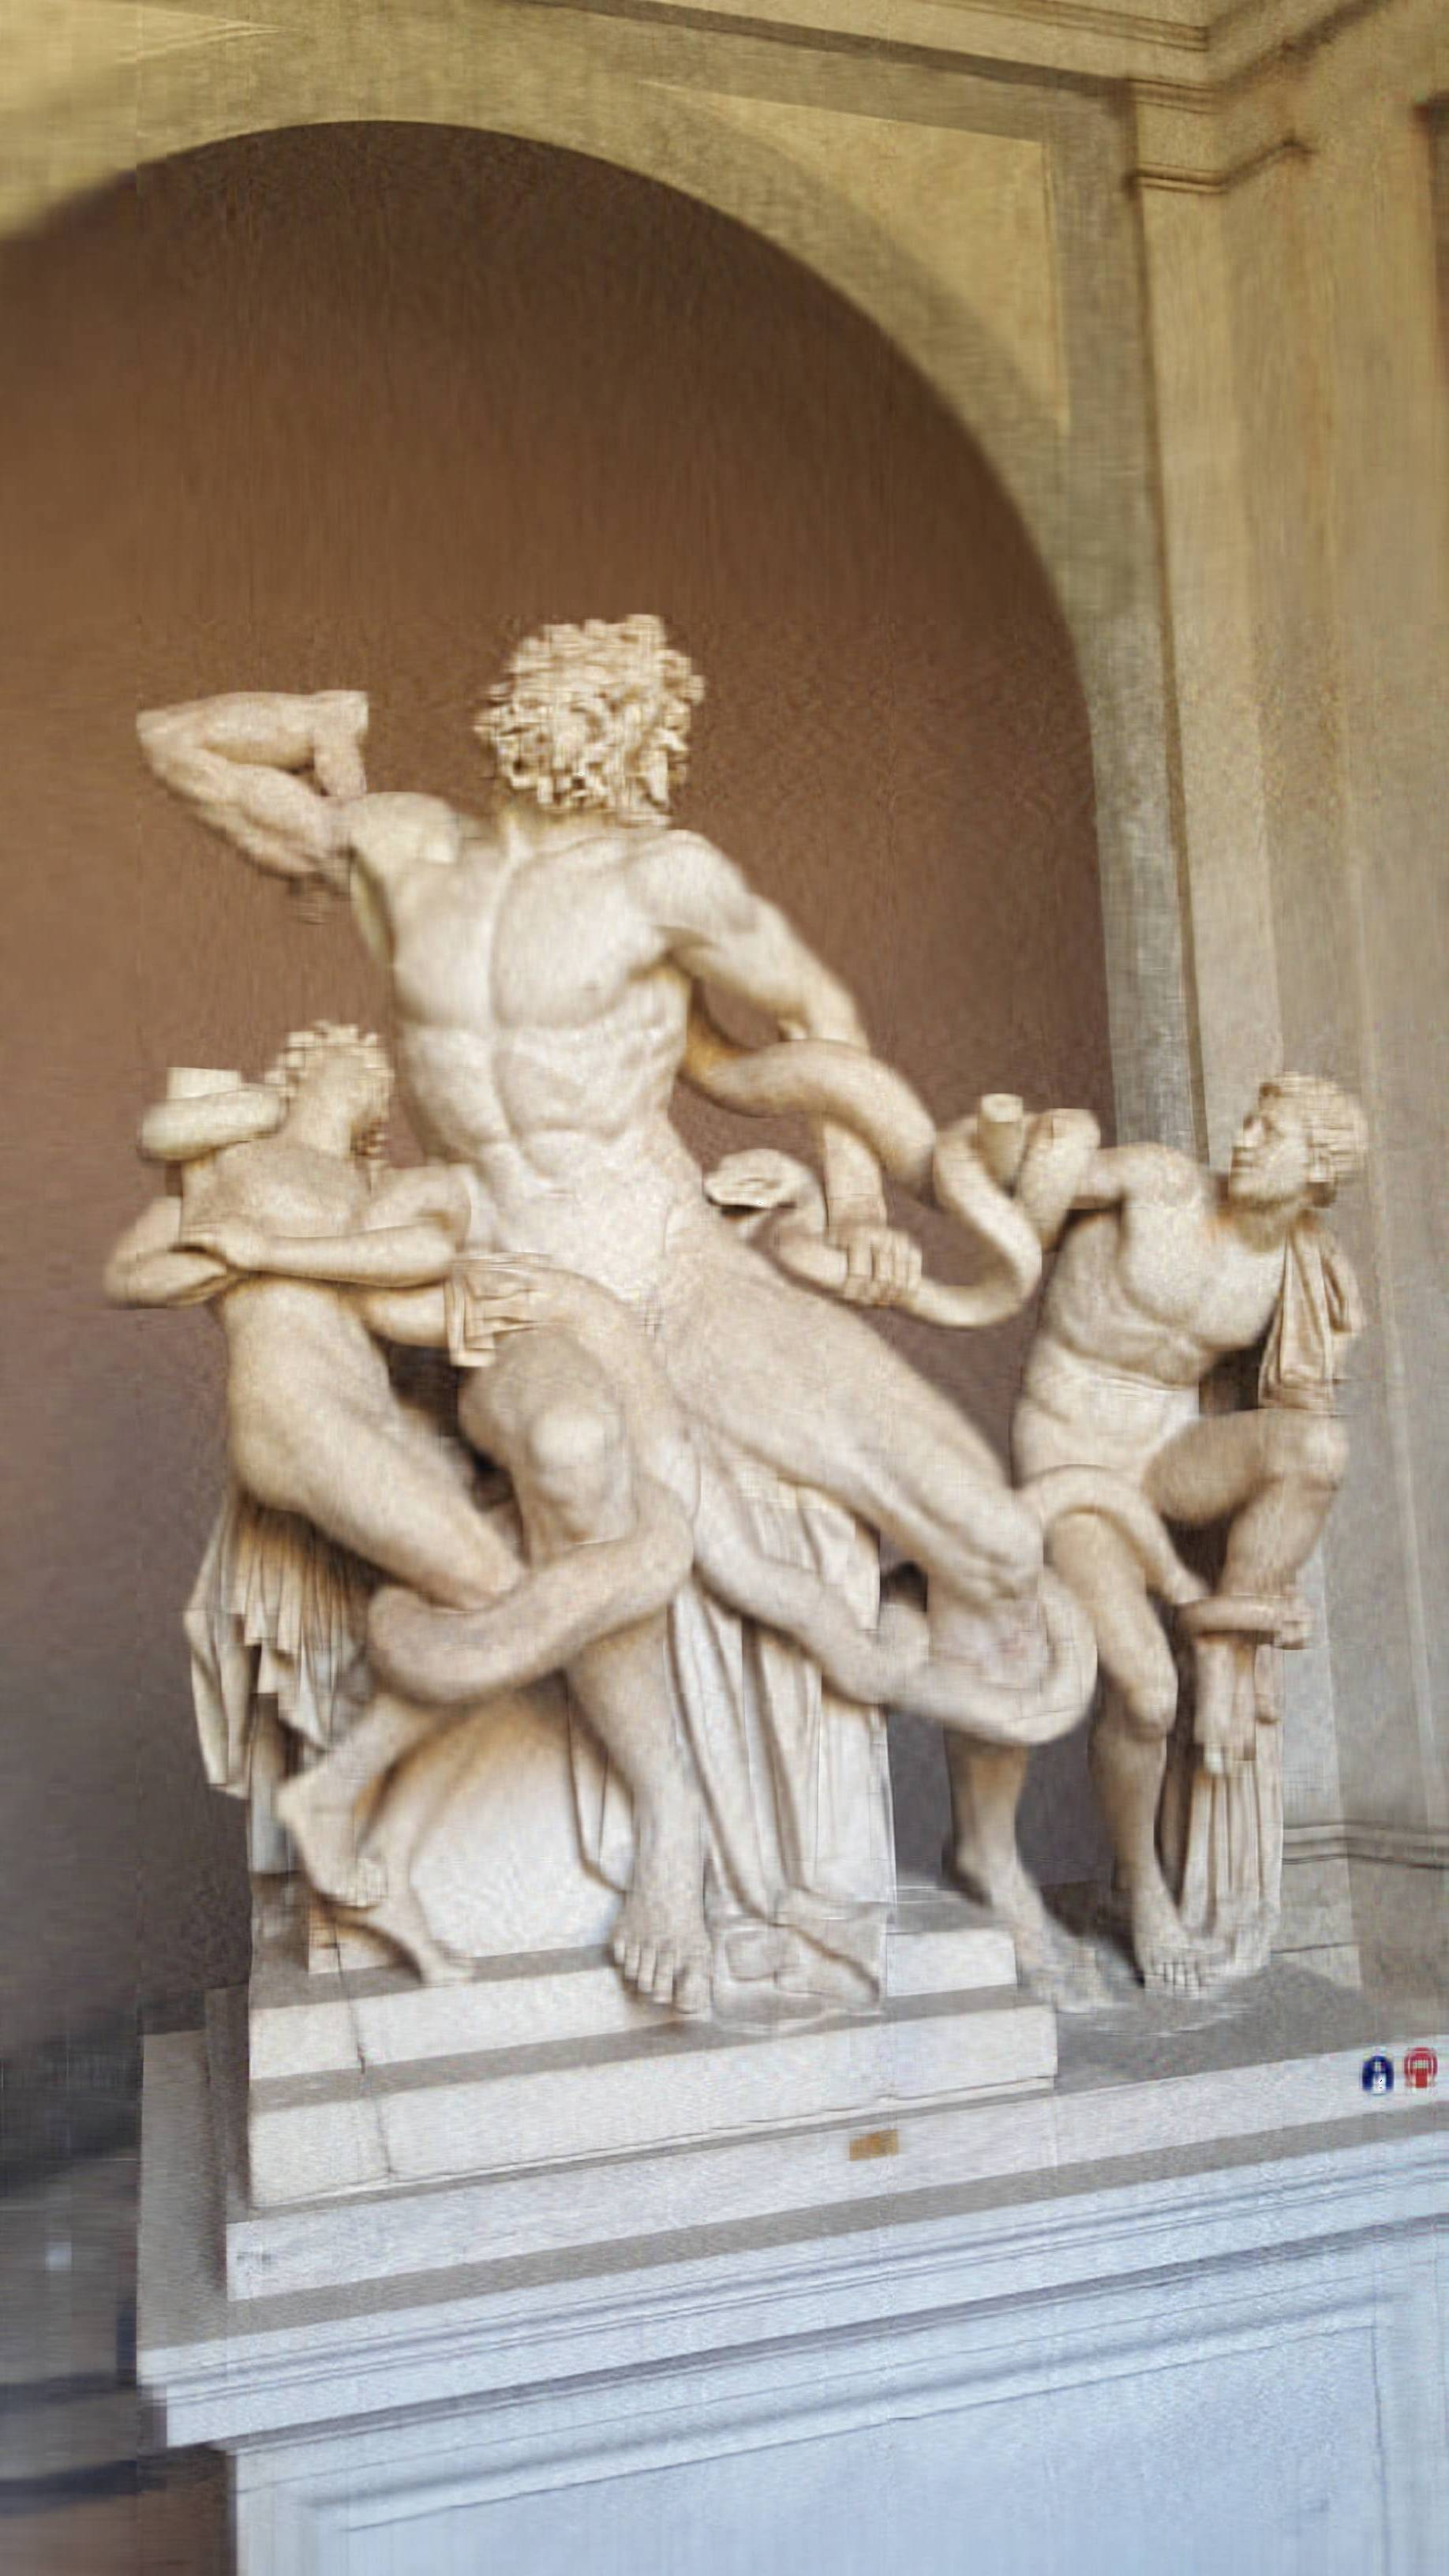

523 components (409.873 bytes - 414 KB):

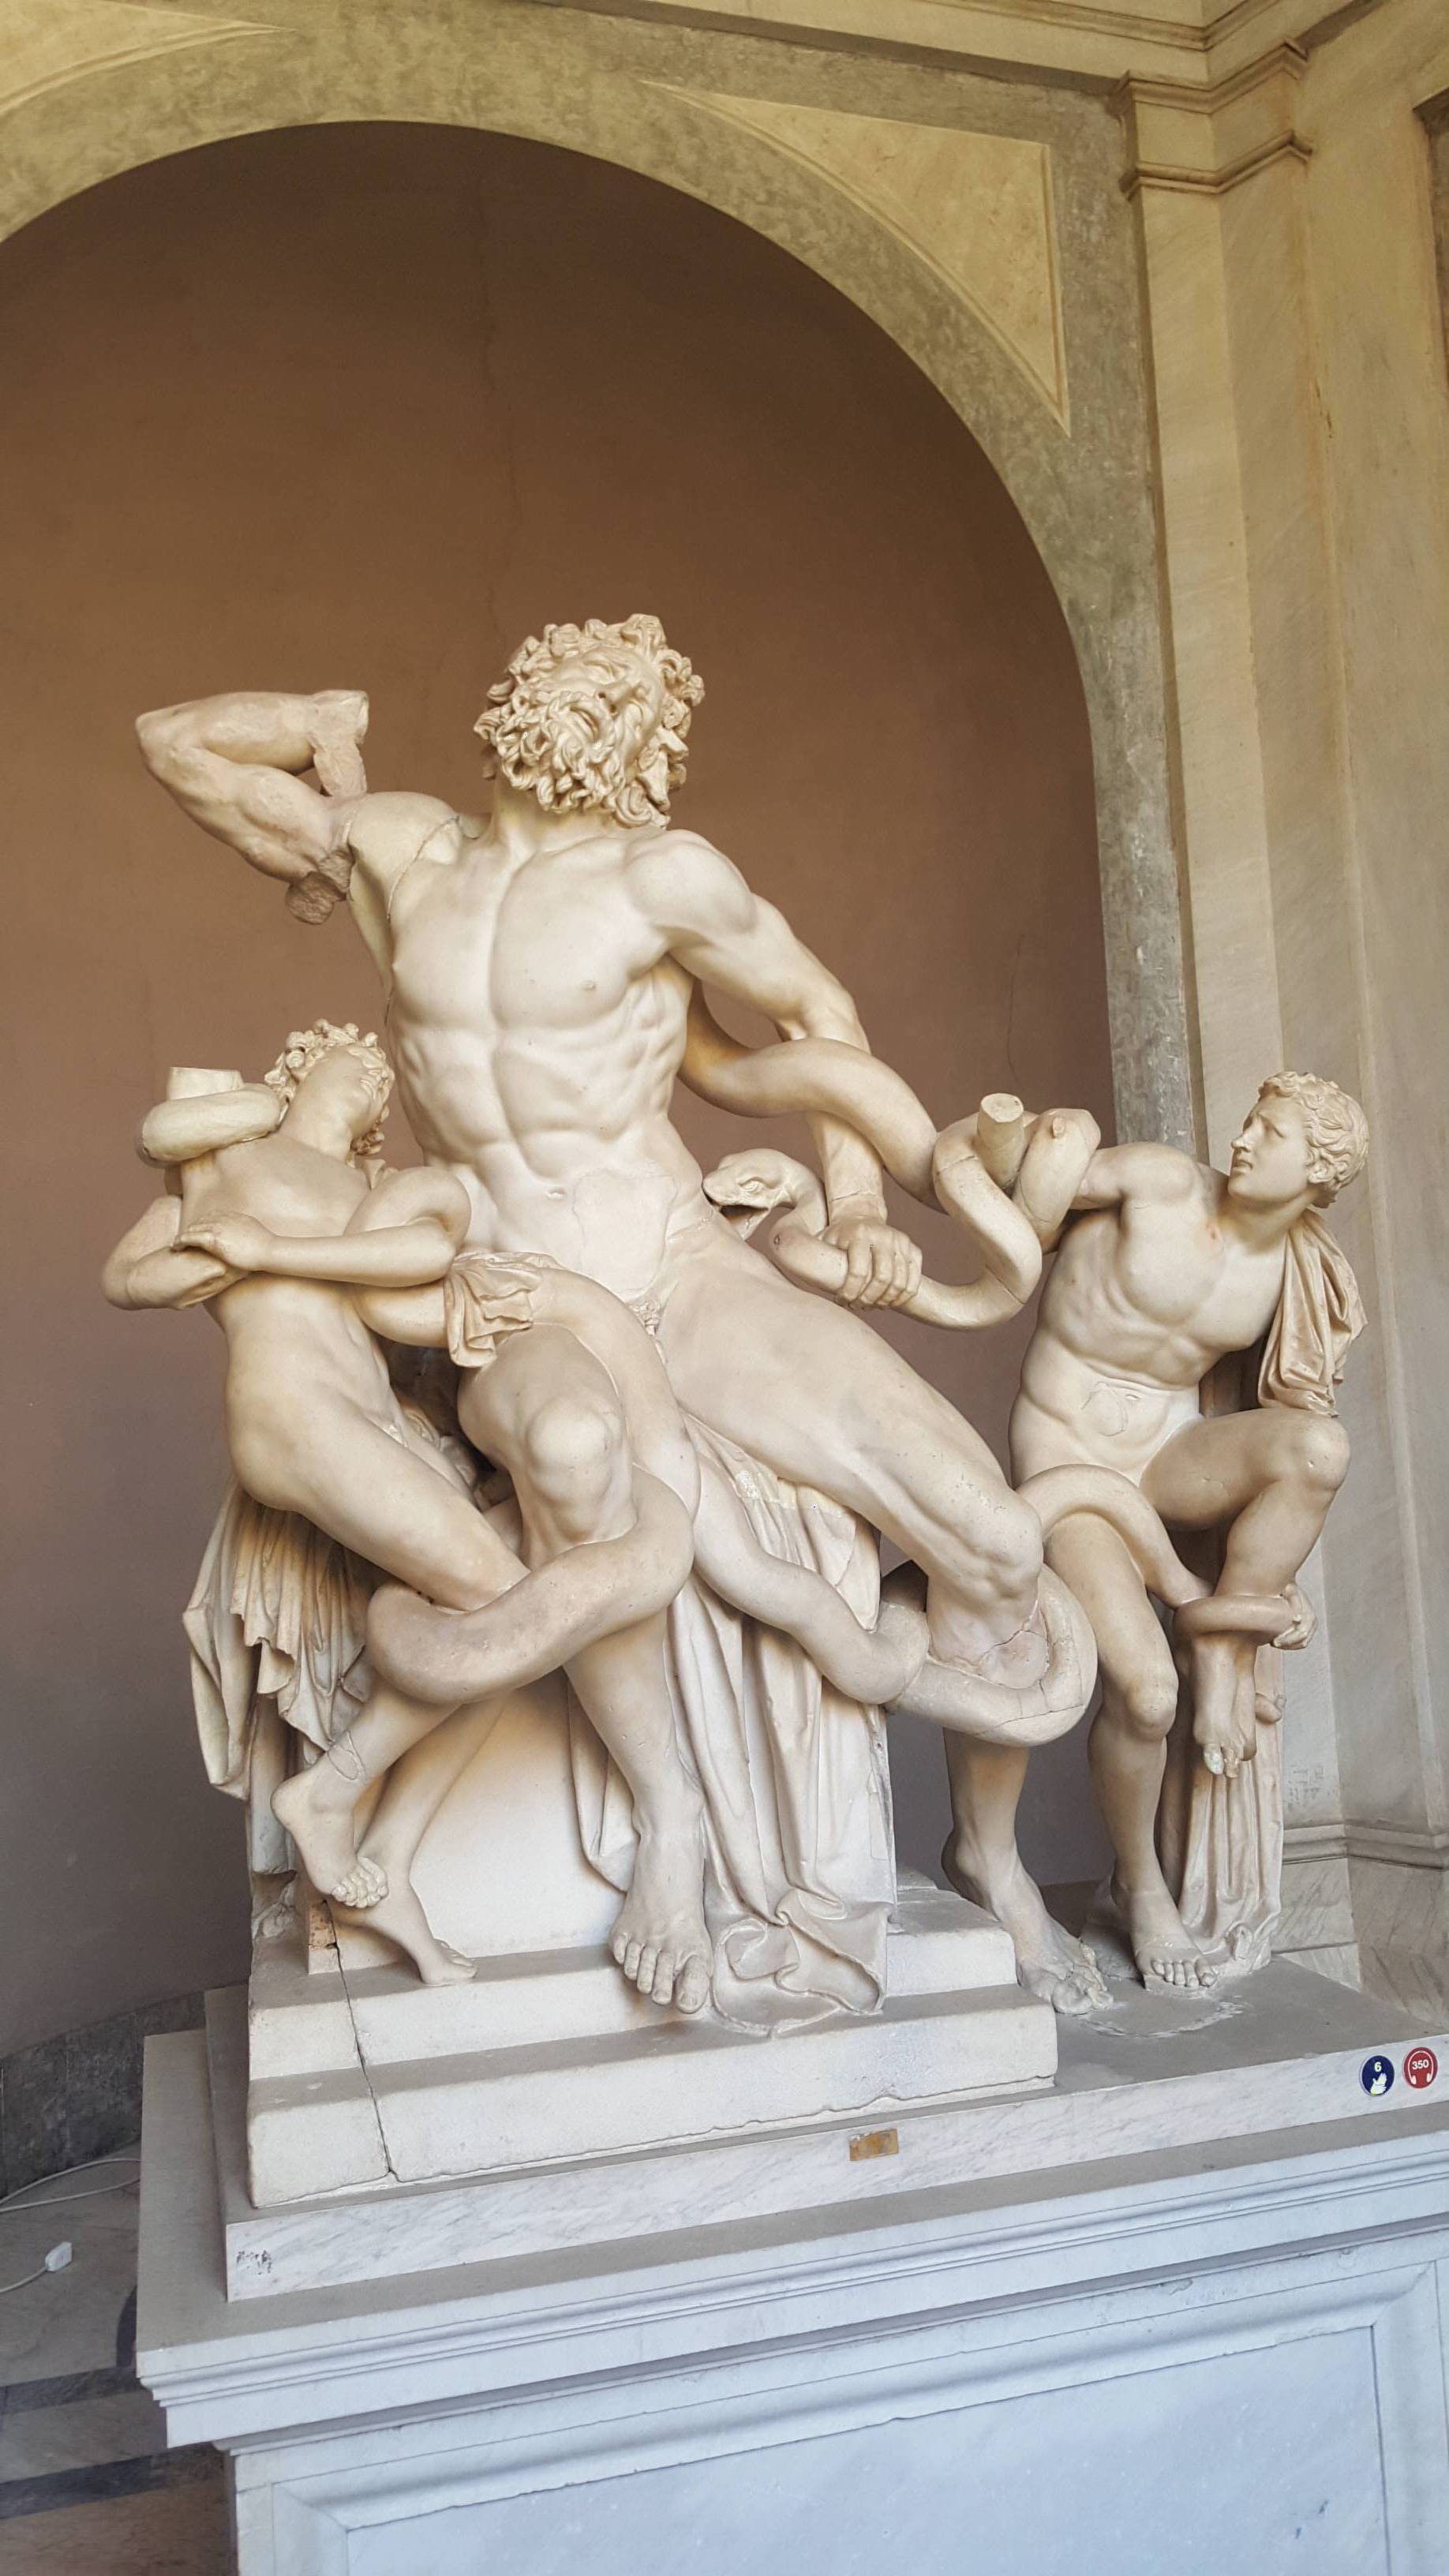

Summary - Imagine Compressing:

Original photo 1836 components (1.243.080 bytes - 1,2 MB) 3 components (182.824 bytes - 188 KB) 43 components (332.384 bytes - 336 KB) 83 components (375.131 bytes - 377 KB) 523 components (409.873 bytes - 414 KB)

As we can see in the different photos, we reduced the components but also the memory used. The original photo was taken with my smart phone during one travel to Rome, and as we can see the quality is really good, with a lot of components, but I cannot see a lot of difference between the original and the one with 523 components. If we needed to make zoom to the photo of 523 components, for sure we would feel the difference, but without zoom is more or less the same. The one with 3 components is not really useful, as we lost a lot of information, we are not able for example to see the shape of the sculpture. In the next one, with 43 components we can see the shape, but the quality is not really good, even we can see a lot of pixels. Finally in the one of 83 we can see the shape of the figure, also we can see more pixels than the previous one with 43 components.

Final conclusion - Imagine Compressing:

Image compressing with PCA could have a lot of application, for example when building a website and we want to show images. In case of building a website, if I would like to show the different things that one can visit in Rome with all the details, maybe I will use the one with 523 components, in this case the image was compressed in 67%. On the other hand, it is possible that in one website we would not like to show all the full details, just to show the image with escalated dimension as showed before (almost we will not be able to see the pixels), in this case I would use the one with 83 components, which compressed the picture in almost 70%.

Maybe there is not a lot of difference between the picture with 523 components and the one with 83 components, in terms of compression, but if we want to show several photos on the same page, the sum of the compressions of each one, could cause our website to run in a slow way.

7)Data resources:

In [ ]:
GDP	Eurostat database (tipsau10) - https://ec.europa.eu/eurostat/web/products-datasets/-/tipsau10
I_TR_EX	Eurostat database (tet00047) - https://ec.europa.eu/eurostat/web/products-datasets/-/tet00047
I_TR_IM	Eurostat database (tet00047) - https://ec.europa.eu/eurostat/web/products-datasets/-/tet00047
E_TR_EX	Eurostat database (tet00055) - https://ec.europa.eu/eurostat/web/products-datasets/-/tet00055
E_TR_IM	Eurostat database (tet00055) - https://ec.europa.eu/eurostat/web/products-datasets/-/tet00055
A_T_G	Eurostat database (ttr00011) – https://ec.europa.eu/eurostat/web/products-datasets/-/ttr00011
M_T_G	Eurostat database (ttr00009) - https://ec.europa.eu/eurostat/web/products-datasets/-/ttr00009/